## Student Performance Indicator
Life cycle of Project
- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model


1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.


2.1 Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

Importing the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
# Shape of the dataset
df.shape

(1000, 8)

### 2.2 Dataset information
- gender : sex of students -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced)
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score
## 3. Data Checks to perform
- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column
### 3.1 Check Missing values

In [4]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no missing values in the data set

### 3.2 Check Duplicates

In [5]:
df.duplicated().sum()

0

There are no duplicates values in the data set
### 3.3 Check data type

In [6]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Checking the number of unique values of each column

In [7]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.5 Check statistics of data set

In [8]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Insight
- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

### 3.7 Exploring Data

In [9]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [10]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### 3.8 Adding columns for "Total Score" and "Average"

In [11]:
df['average'] = (df['math_score'] + df['reading_score'] + df['writing_score'])/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [12]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [13]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


Insights
- From above values we get students have performed the worst in Maths
- Best performance is in reading section

## 4. Exploring Data ( Visualization )
### 4.1 Visualize average score distribution to make some conclusion.
- Histogram
- Kernel Distribution Function (KDE)
#### 4.1.1 Histogram & KDE

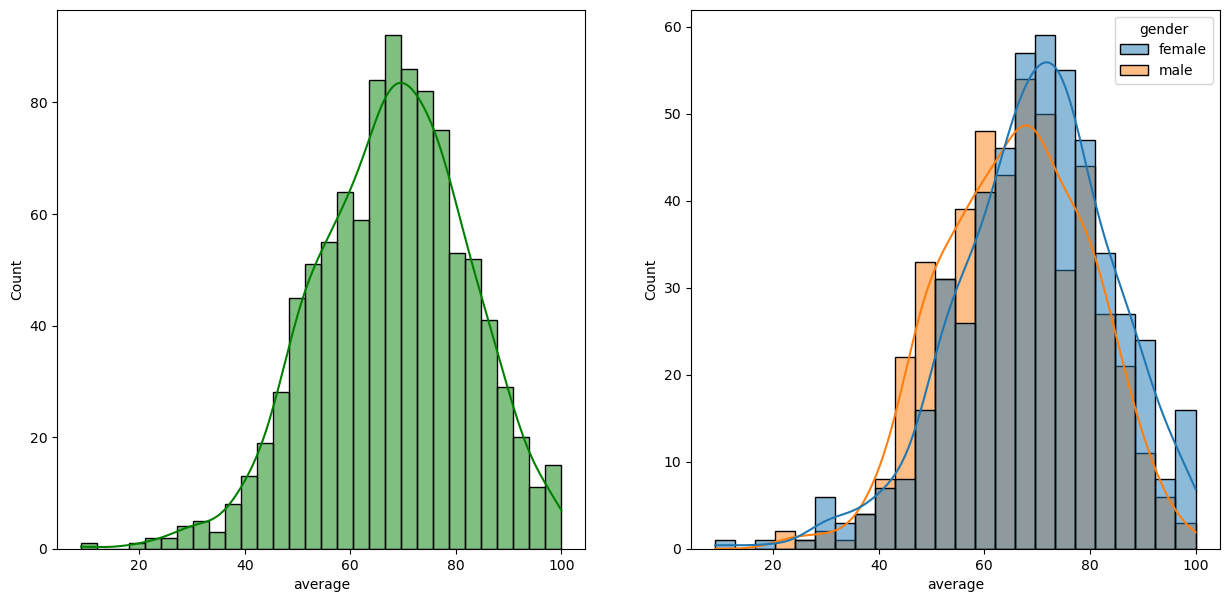

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

Insights
- Female students tend to perform well then male students.

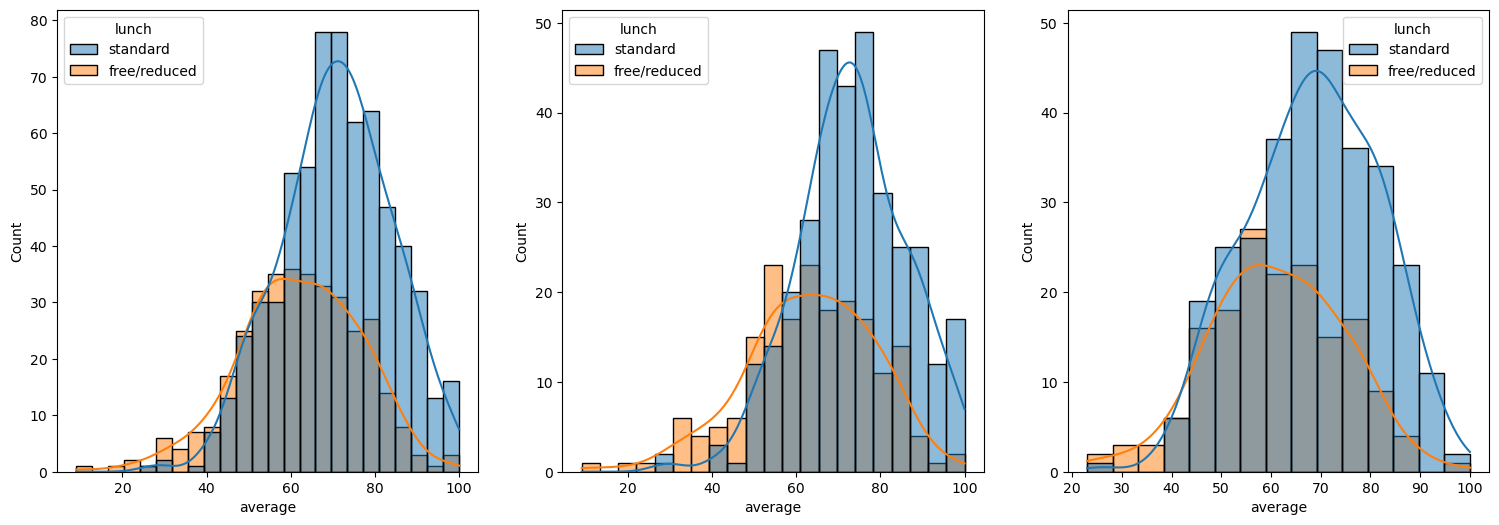

In [15]:
hue_ord = df.lunch.unique()
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch', hue_order = hue_ord)
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch', hue_order = hue_ord)
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch', hue_order = hue_ord)
plt.show()

Insights
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

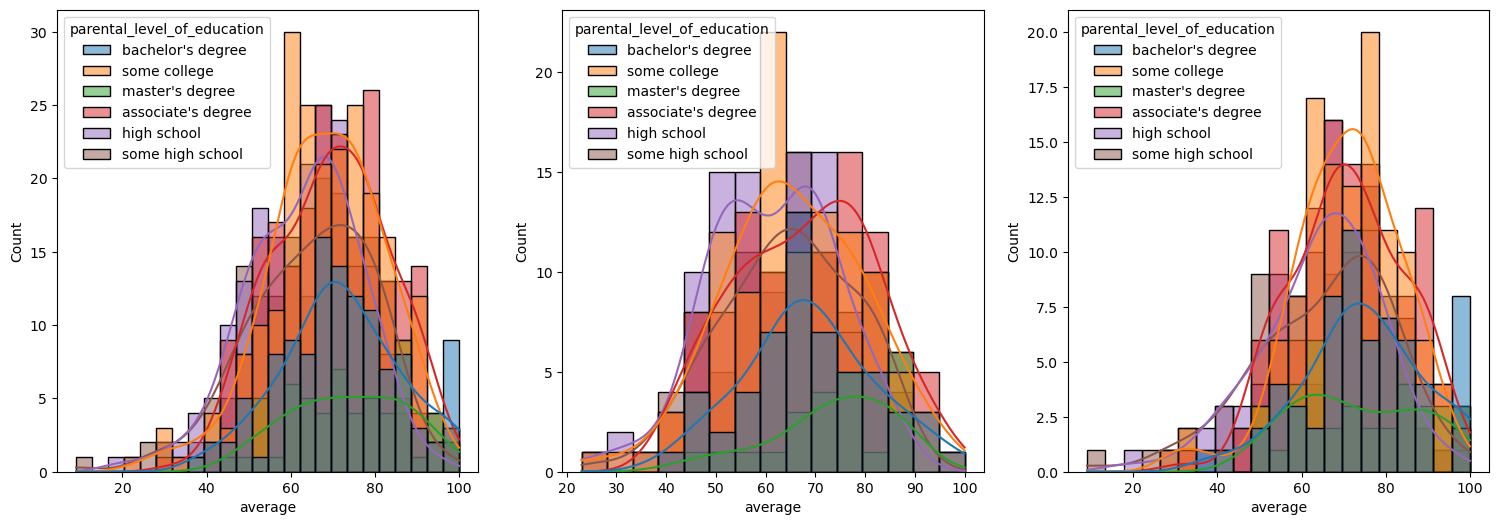

In [16]:
hue_ord = df.parental_level_of_education.unique()
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education', hue_order = hue_ord)
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education', hue_order = hue_ord)
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education', hue_order = hue_ord)
plt.show()

Insights
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

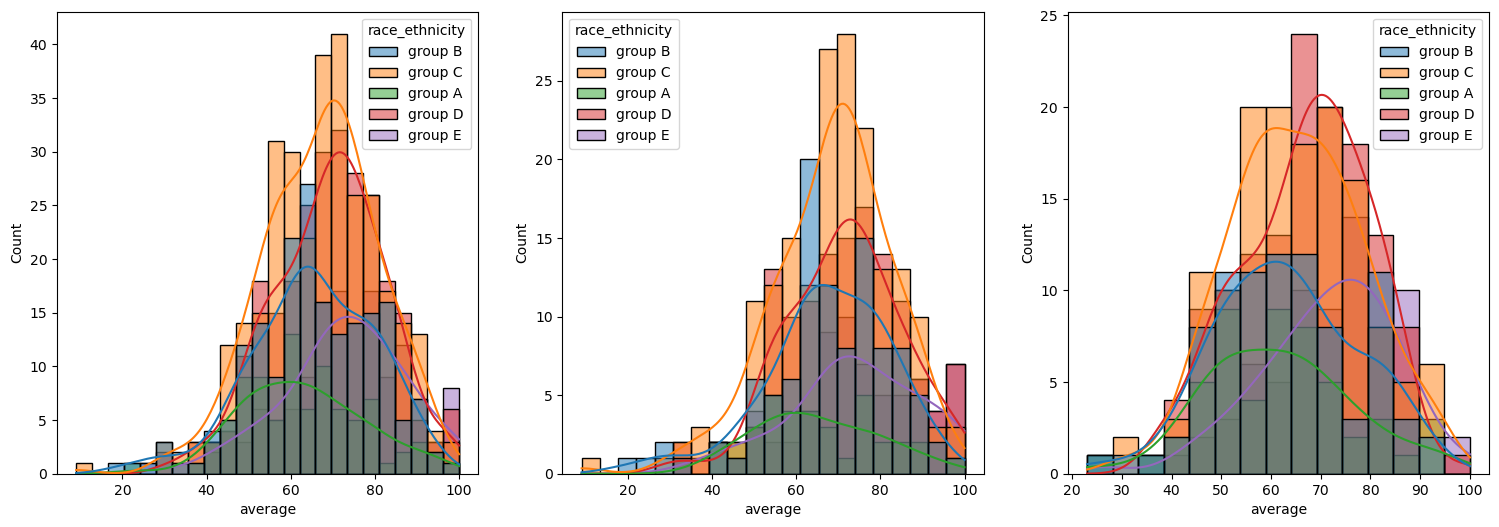

In [17]:
hue_ord = df.race_ethnicity.unique()
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity', hue_order = hue_ord)
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity', hue_order = hue_ord)
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity', hue_order = hue_ord)
plt.show()

Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female
### 4.2 Maximumum score of students in all three subjects

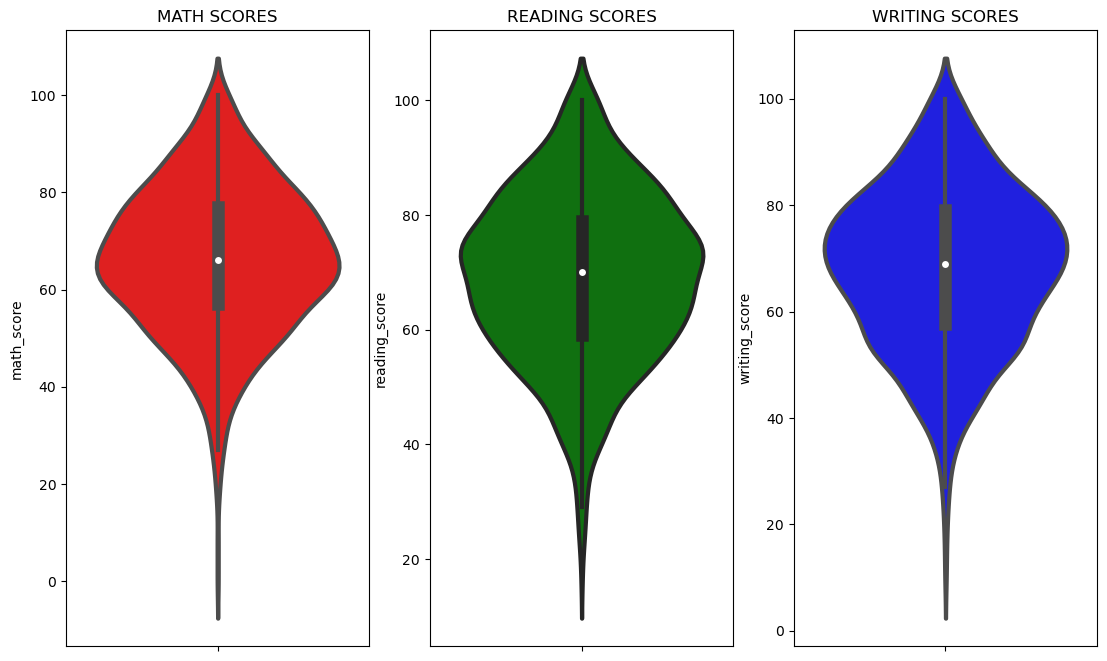

In [18]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

Insights
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80
### 4.3 Multivariate analysis using pieplot

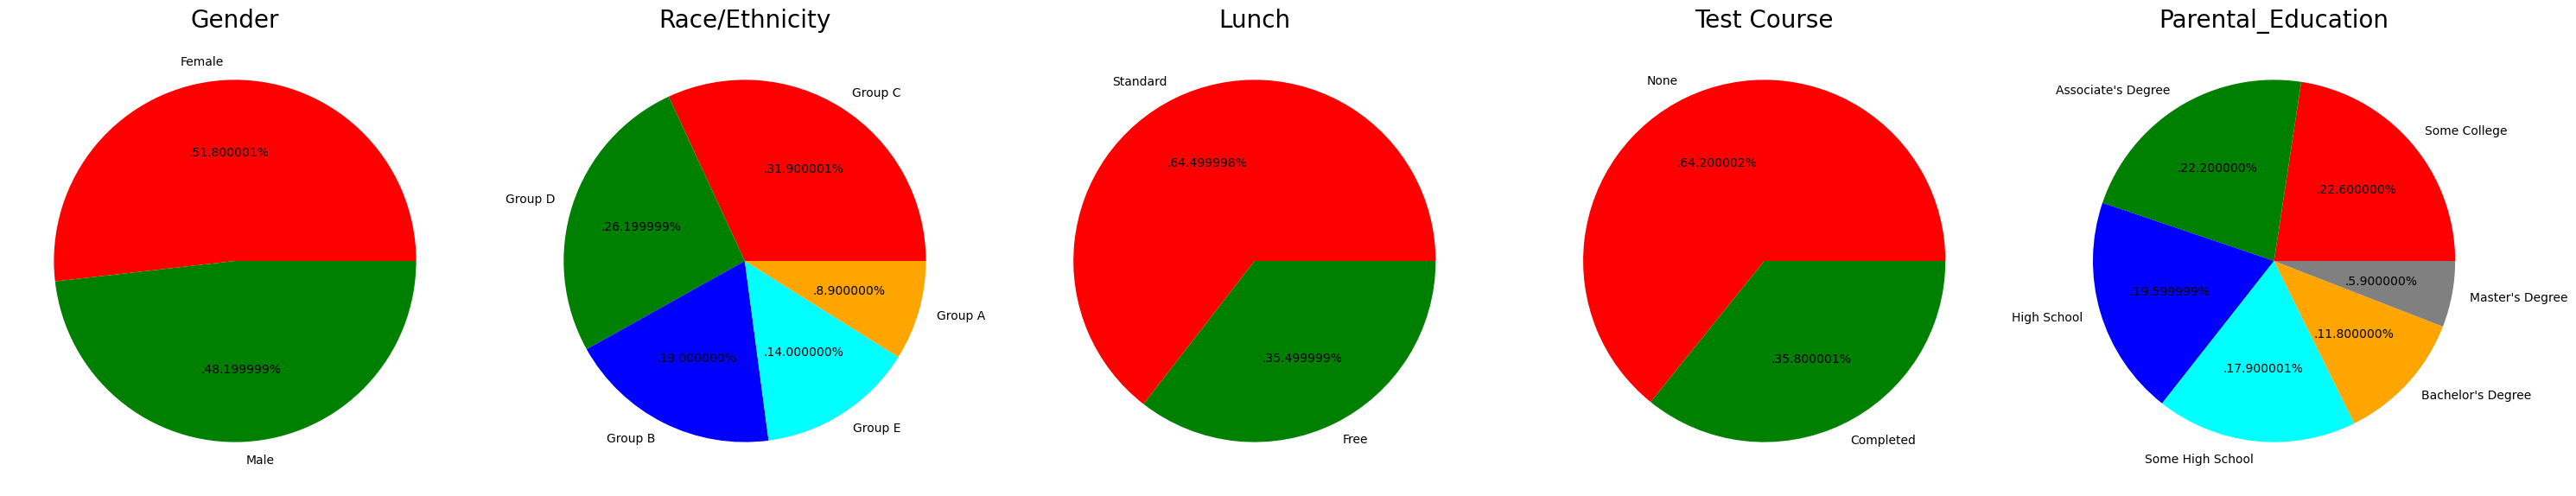

In [19]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental_Education', fontsize = 20)
plt.axis('off')

plt.tight_layout()
plt.grid()

plt.show()

Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"
### 4.4 Feature Wise Visualization
#### 4.4.1 GENDER COLUMN
- How is distribution of Gender ?
- Is gender has any impact on student's performance ?

UNIVARIATE ANALYSIS ( How is distribution of Gender ? 

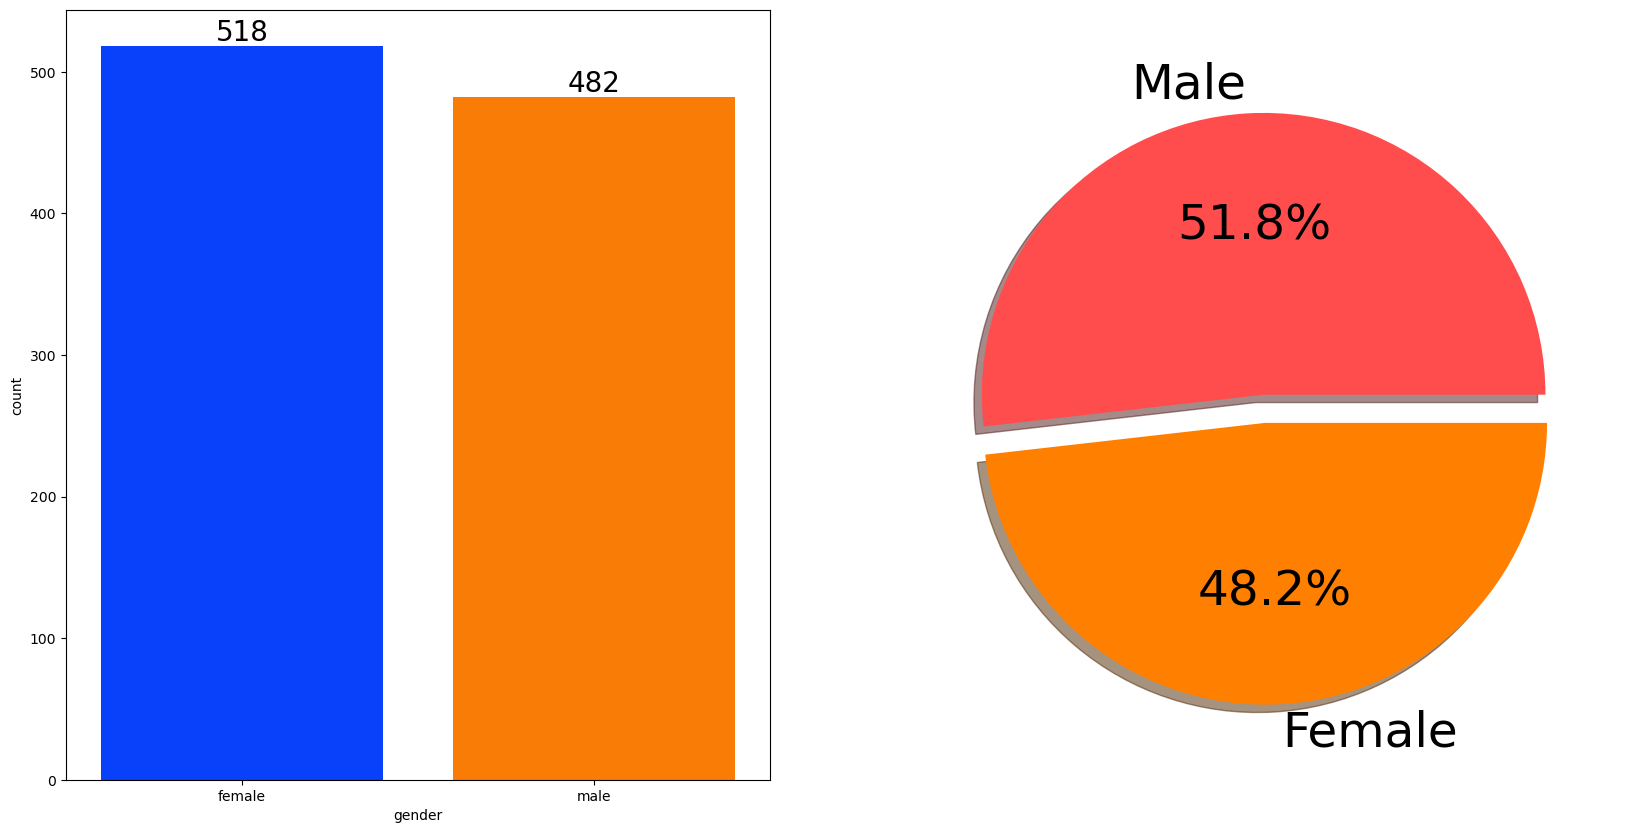

In [20]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),
        labels=['Male','Female'],
        explode=[0,0.1],
        autopct='%1.1f%%',
        shadow=True,
        colors=['#ff4d4d','#ff8000'],
        textprops={'fontsize': 35})

plt.show()

Insights
- Gender has balanced data with female students are 518 (52%) and male students are 482 (48%)

BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )

In [21]:
gender_group = df.groupby('gender').mean()
gender_group

,math_score,reading_score,writing_score,average
gender,,,,
female,63.633205,72.608108,72.467181,69.569498
male,68.728216,65.473029,63.311203,65.837483


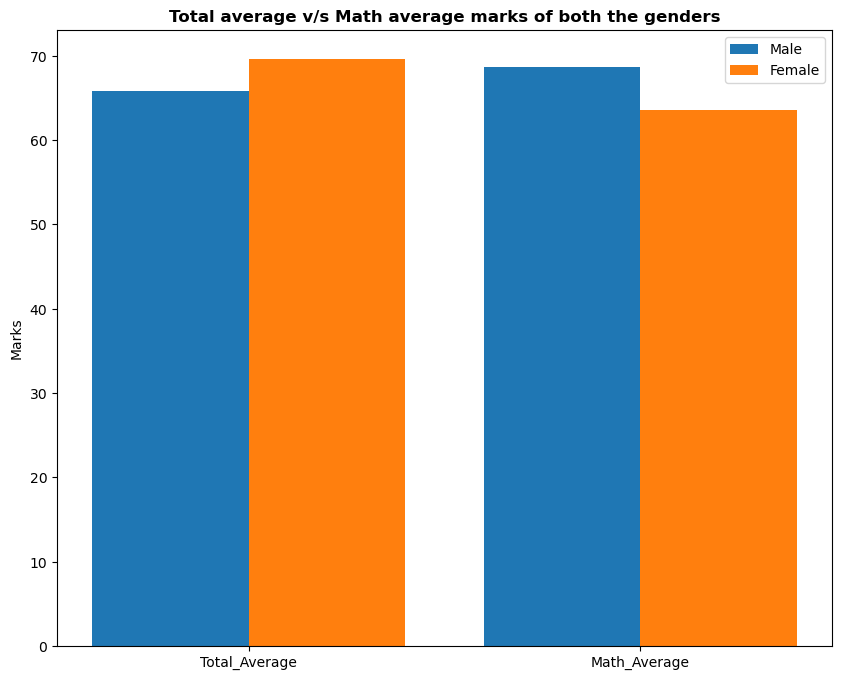

In [22]:
plt.figure(figsize=(10, 8))

X = ['Total_Average','Math_Average']

female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

Insights
- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.

### 4.4.2 RACE/EHNICITY COLUMN
- How is Group wise distribution ?
- Is Race/Ehnicity has any impact on student's performance ?

UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

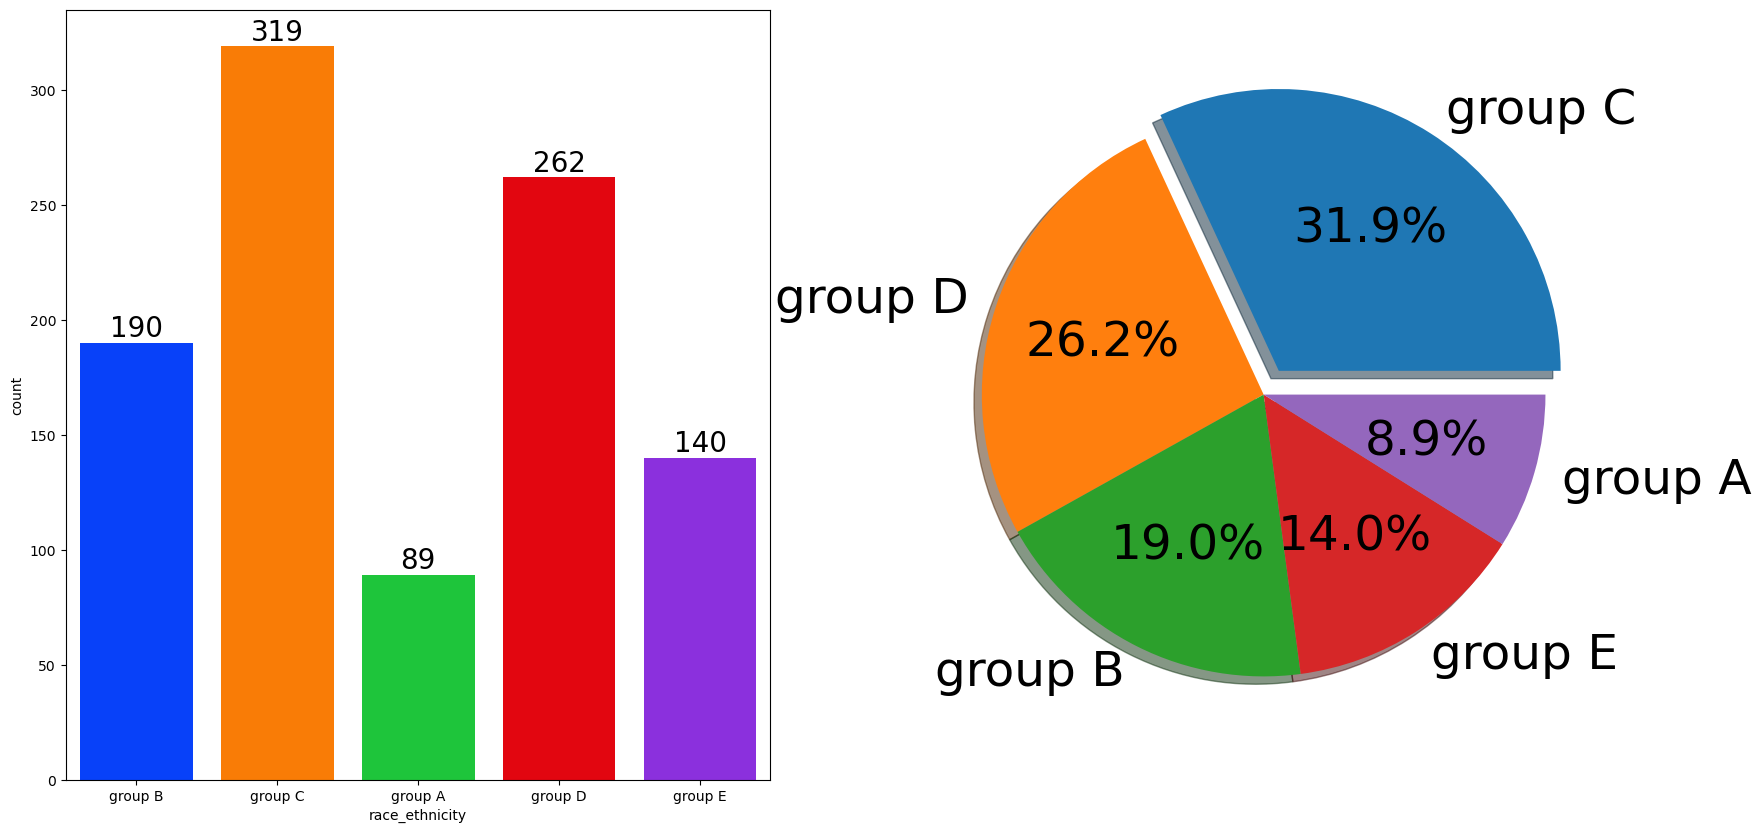

In [23]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),
        labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],
        autopct='%1.1f%%',shadow=True,textprops={'fontsize': 35})

plt.show()   

Insights
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

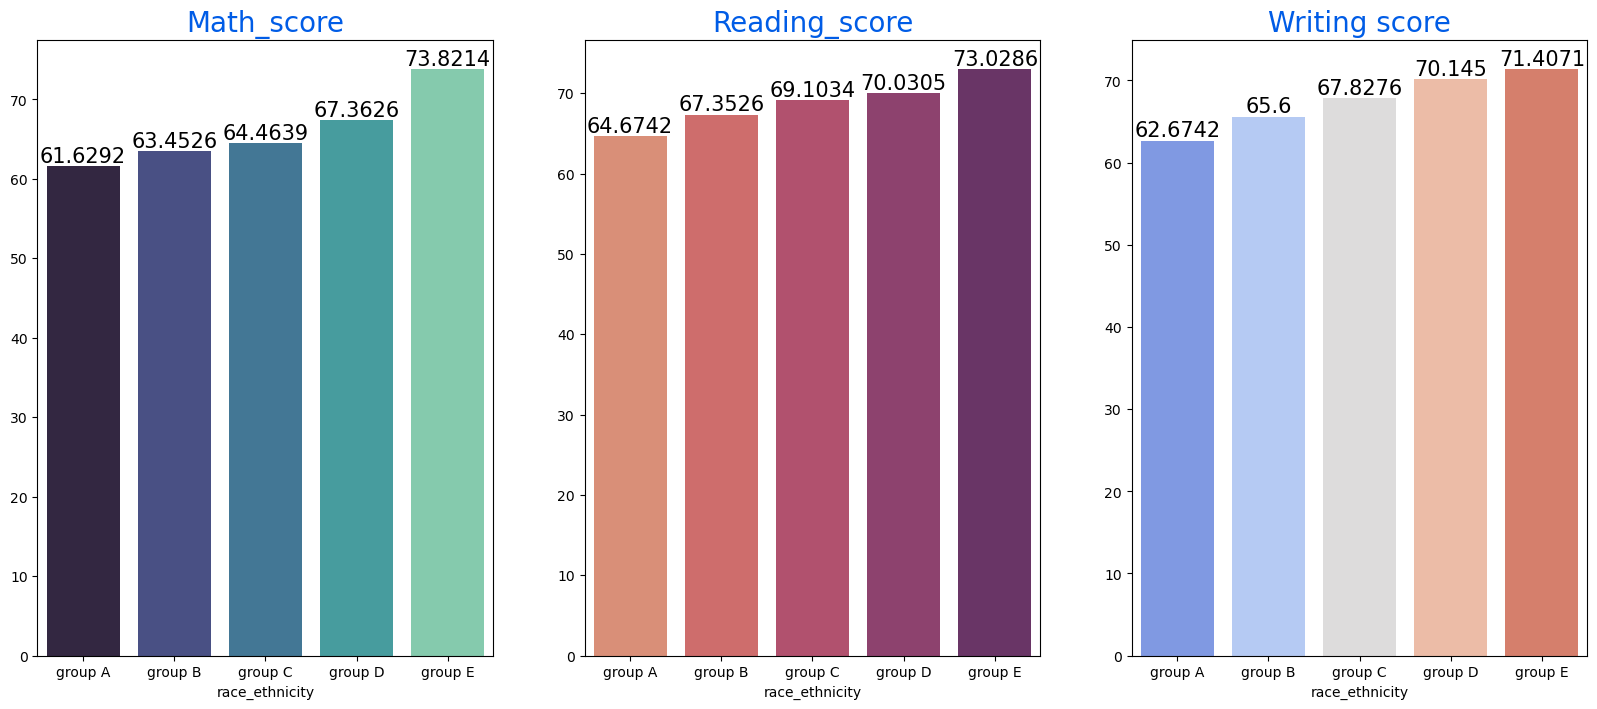

In [24]:
Group_data2=df.groupby('race_ethnicity')

f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,
            y=Group_data2['math_score'].mean().values,
            palette = 'mako',ax=ax[0])

ax[0].set_title('Math_score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,
            y=Group_data2['reading_score'].mean().values,
            palette = 'flare',ax=ax[1])

ax[1].set_title('Reading_score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,
            y=Group_data2['writing_score'].mean().values,
            palette = 'coolwarm',ax=ax[2])

ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

Insights
- Group E students have scored the highest marks.
- Group A students have scored the lowest marks.
- Students from a lower Socioeconomic status have a lower avg in all course subjects

### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?

UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

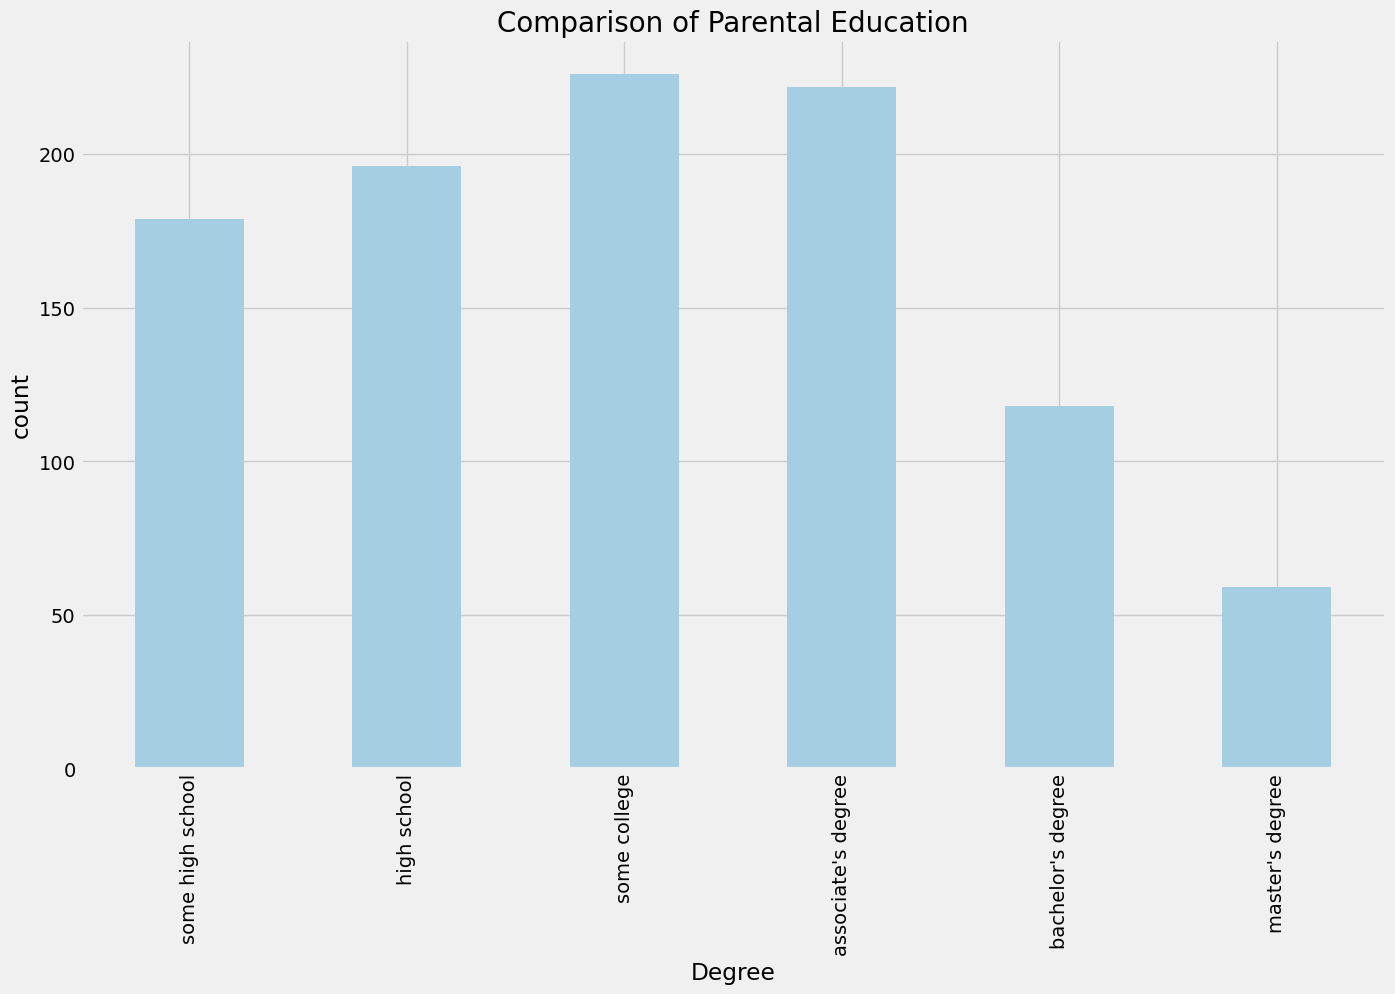

In [25]:
bar_ord = ['some high school', 'high school', 'some college', "associate's degree", "bachelor's degree", "master's degree"]
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
df['parental_level_of_education'].value_counts().reindex(bar_ord).plot(kind = 'bar', colormap='Paired', )
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

Insights
- Largest number of parents are from some college.

BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

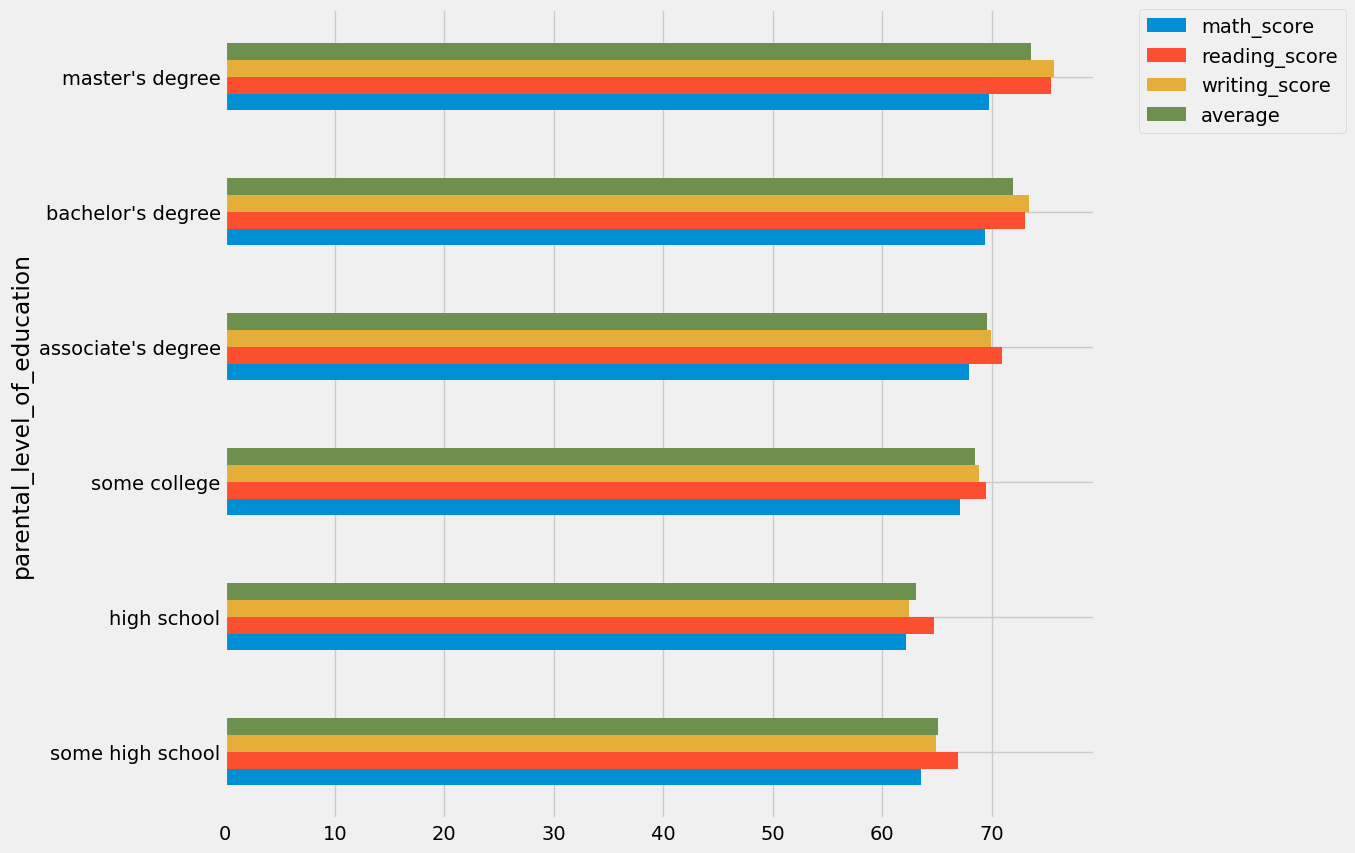

In [26]:
df.groupby('parental_level_of_education').agg('mean').reindex(bar_ord).plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Insights
- The score of student whose parents possess master and bachelor level education are higher than others.

### 4.4.4 LUNCH COLUMN
- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?

UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

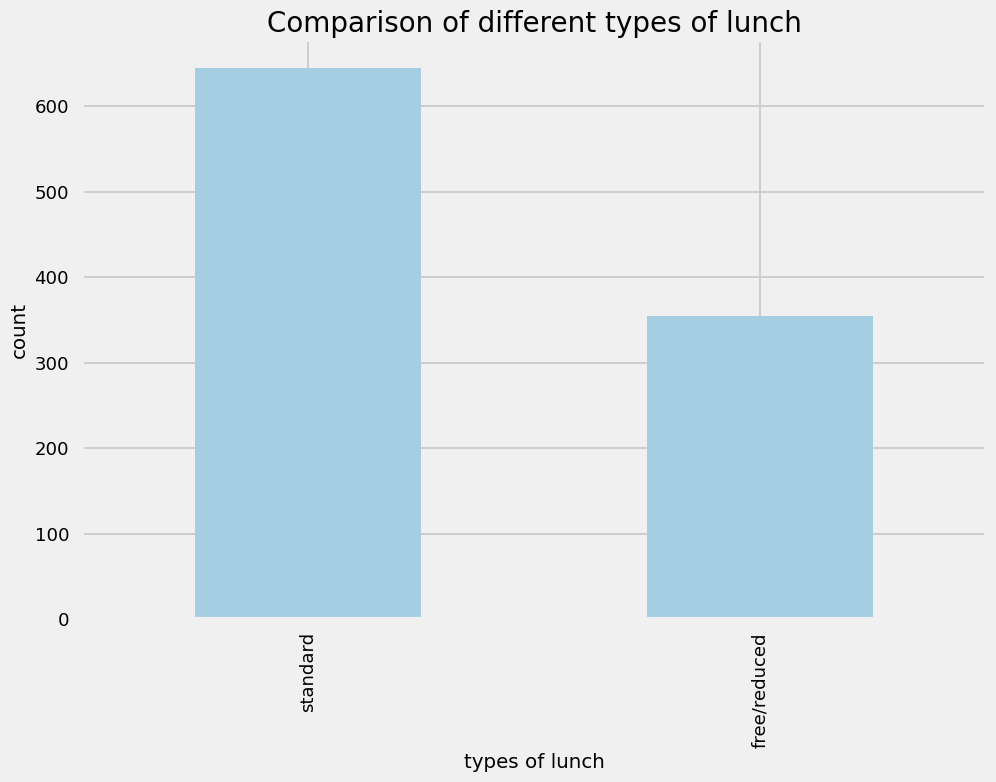

In [27]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
df['lunch'].value_counts().plot(kind ='bar', colormap='Paired')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

Insights
- Students being served Standard lunch was more than free lunch

BIVARIATE ANALYSIS ( Is lunch type intake has any impact on student's performance ? )

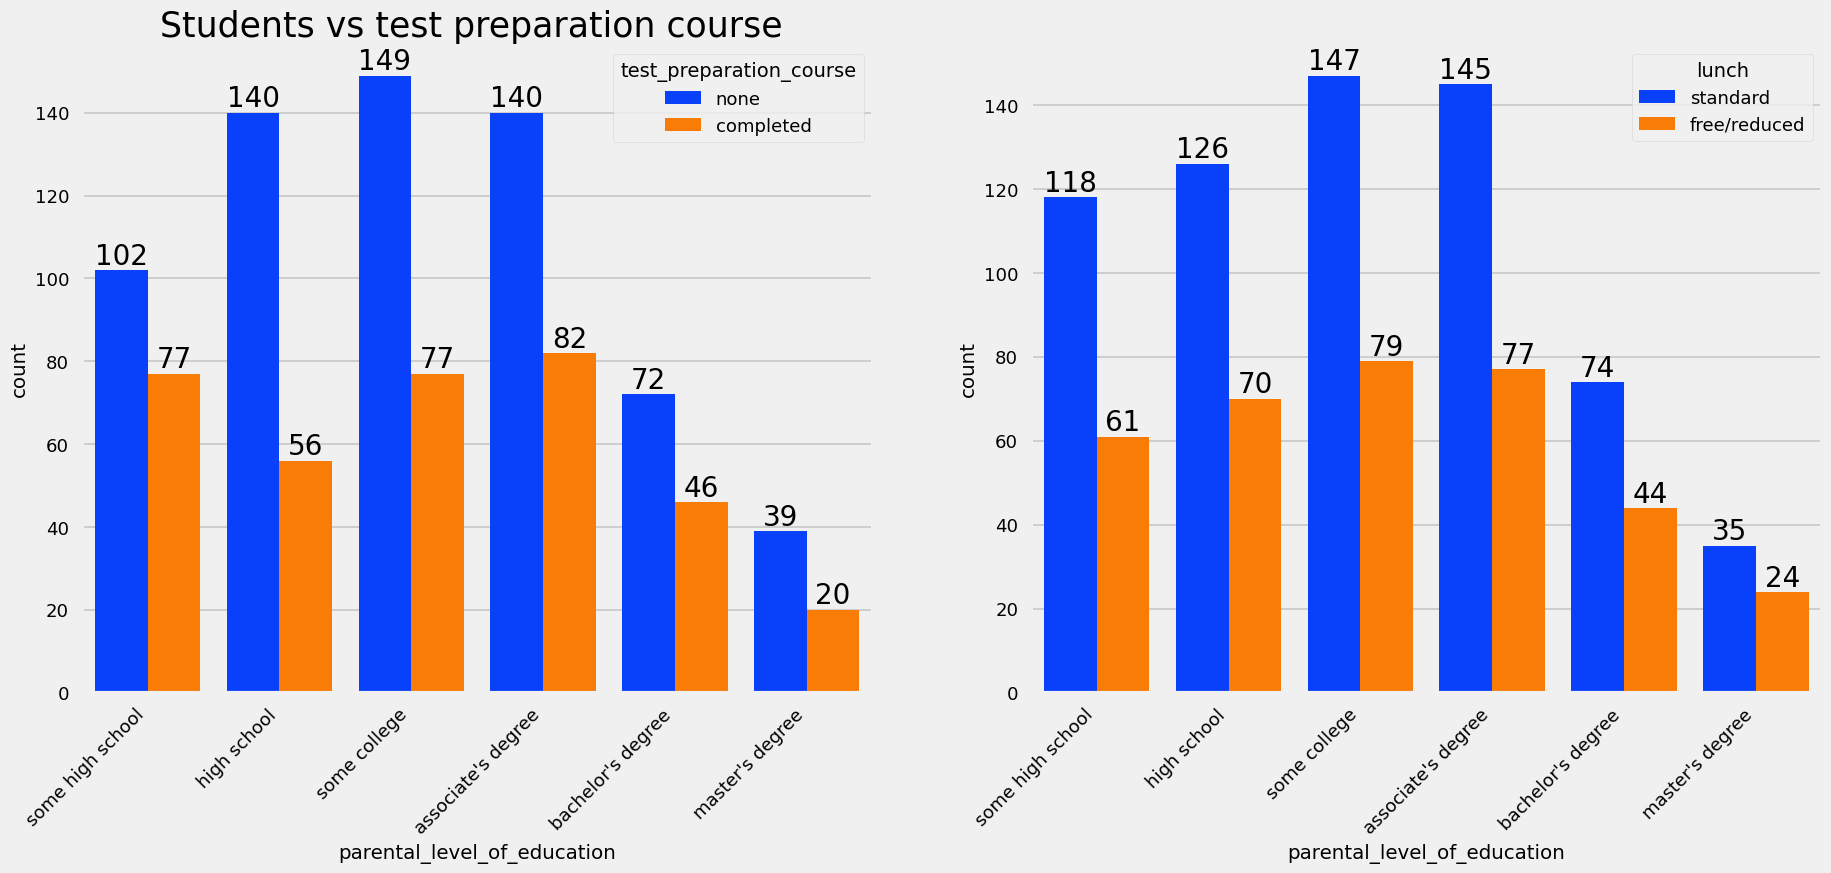

In [28]:
f,ax=plt.subplots(1,2,figsize=(20,8))
chart = sns.countplot(x=df['parental_level_of_education'],
              data=df,palette = 'bright',
              hue='test_preparation_course',
              saturation=0.95,ax=ax[0],
              order = bar_ord)
chart.set_xticklabels(chart.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light')
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
chart = sns.countplot(x=df['parental_level_of_education'],
              data=df,palette = 'bright',
              hue='lunch',
              saturation=0.95,
              ax=ax[1],
              order = bar_ord)
chart.set_xticklabels(chart.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light')
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)  

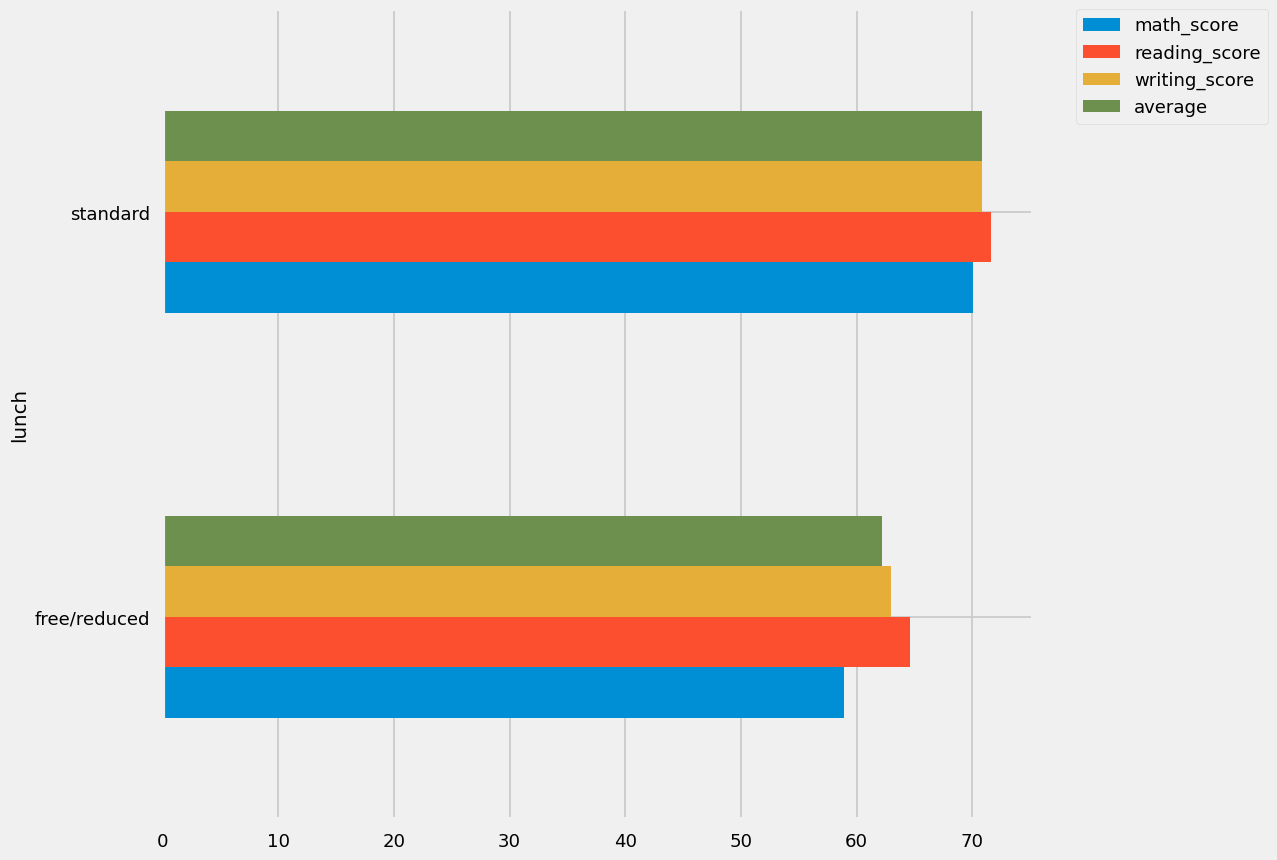

In [29]:
df.groupby('lunch').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Insights
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

### 4.4.5 TEST PREPARATION COURSE COLUMN
- Which type of lunch is most common amoung students ?
- Is Test prepration course has any impact on student's performance ?

BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

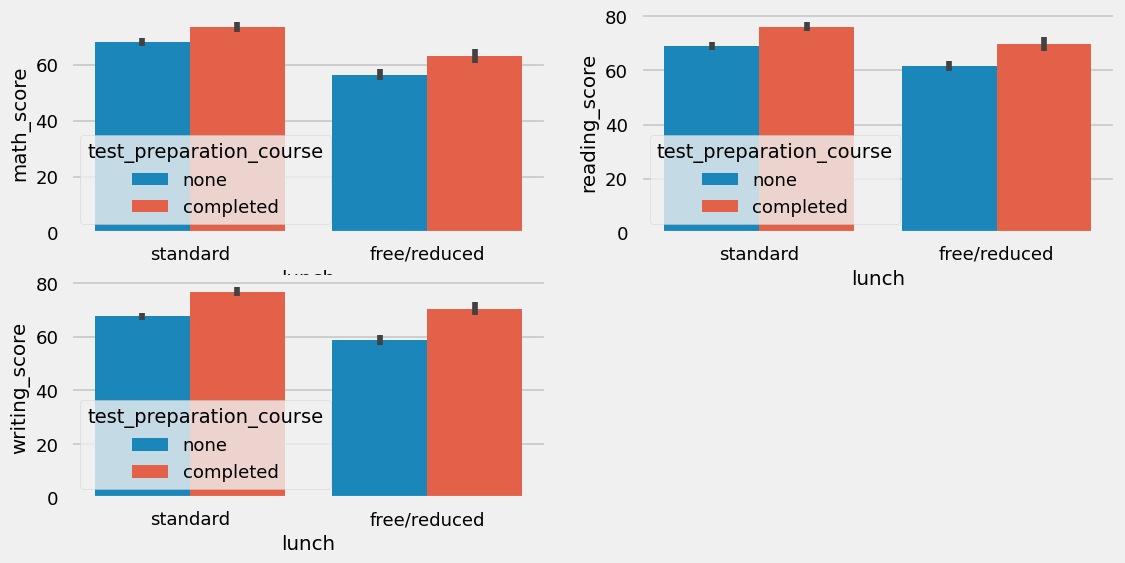

In [30]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

plt.show()

Insights
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

### 4.4.6 CHECKING OUTLIERS

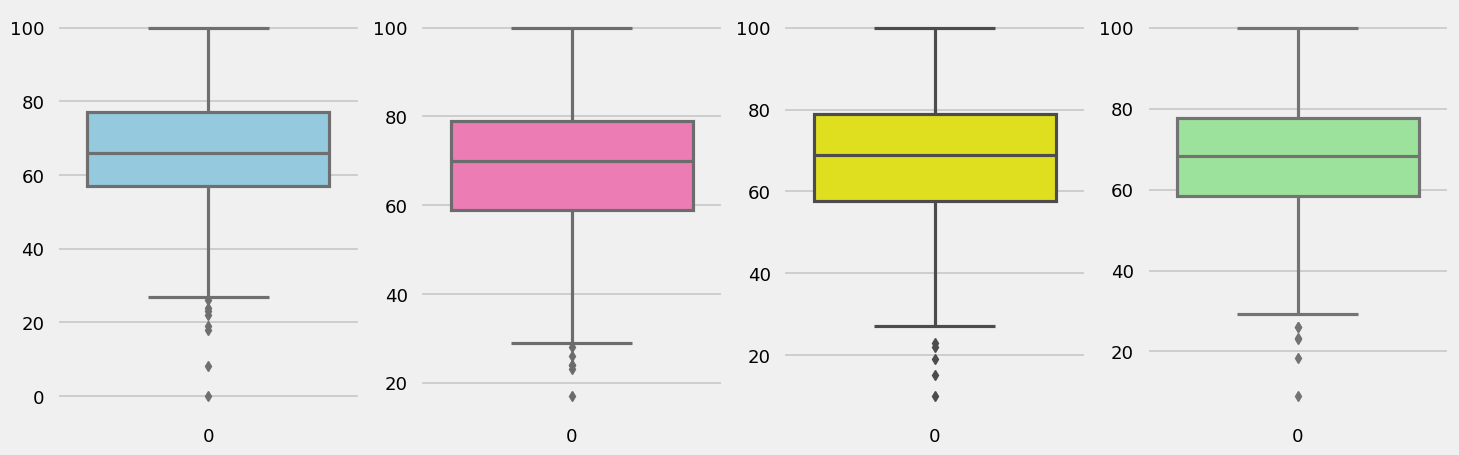

In [31]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

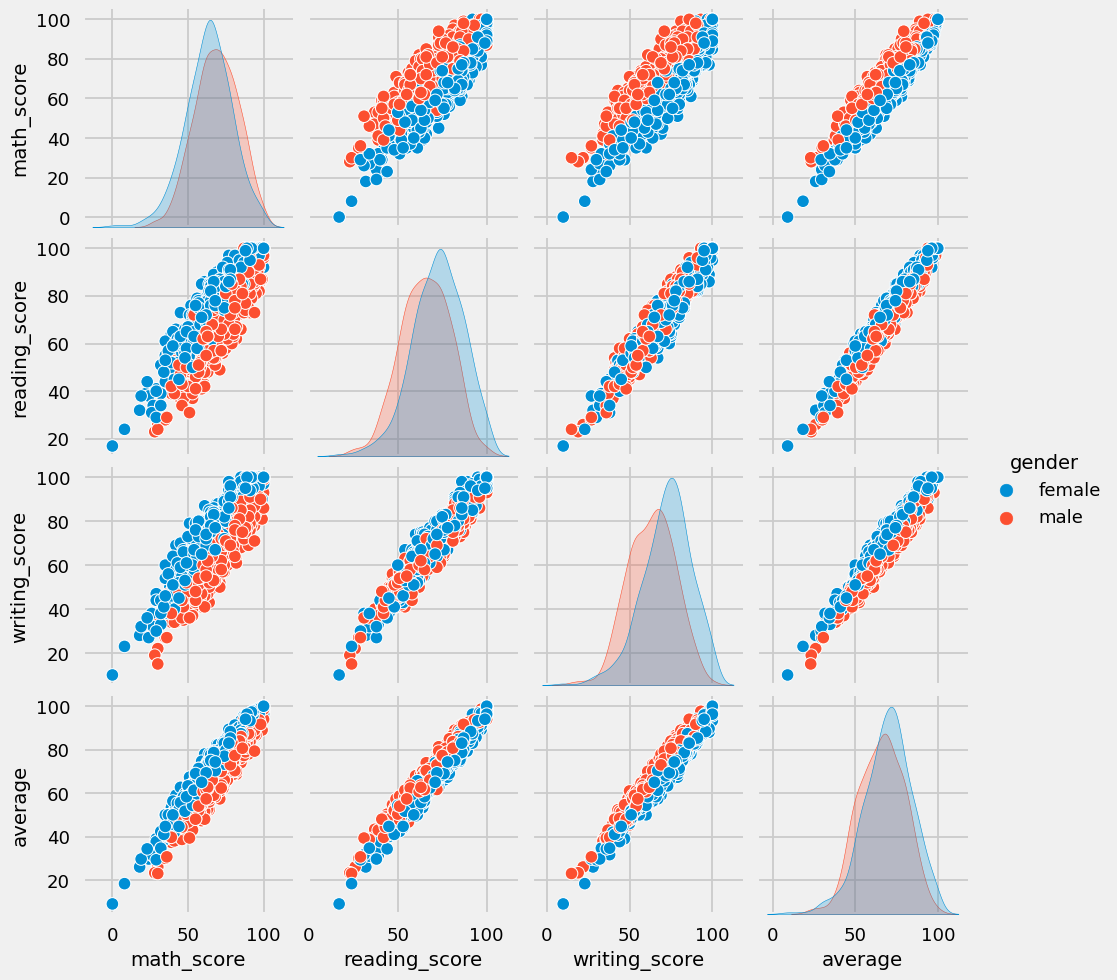

In [32]:
sns.pairplot(df,hue = 'gender')
plt.show()

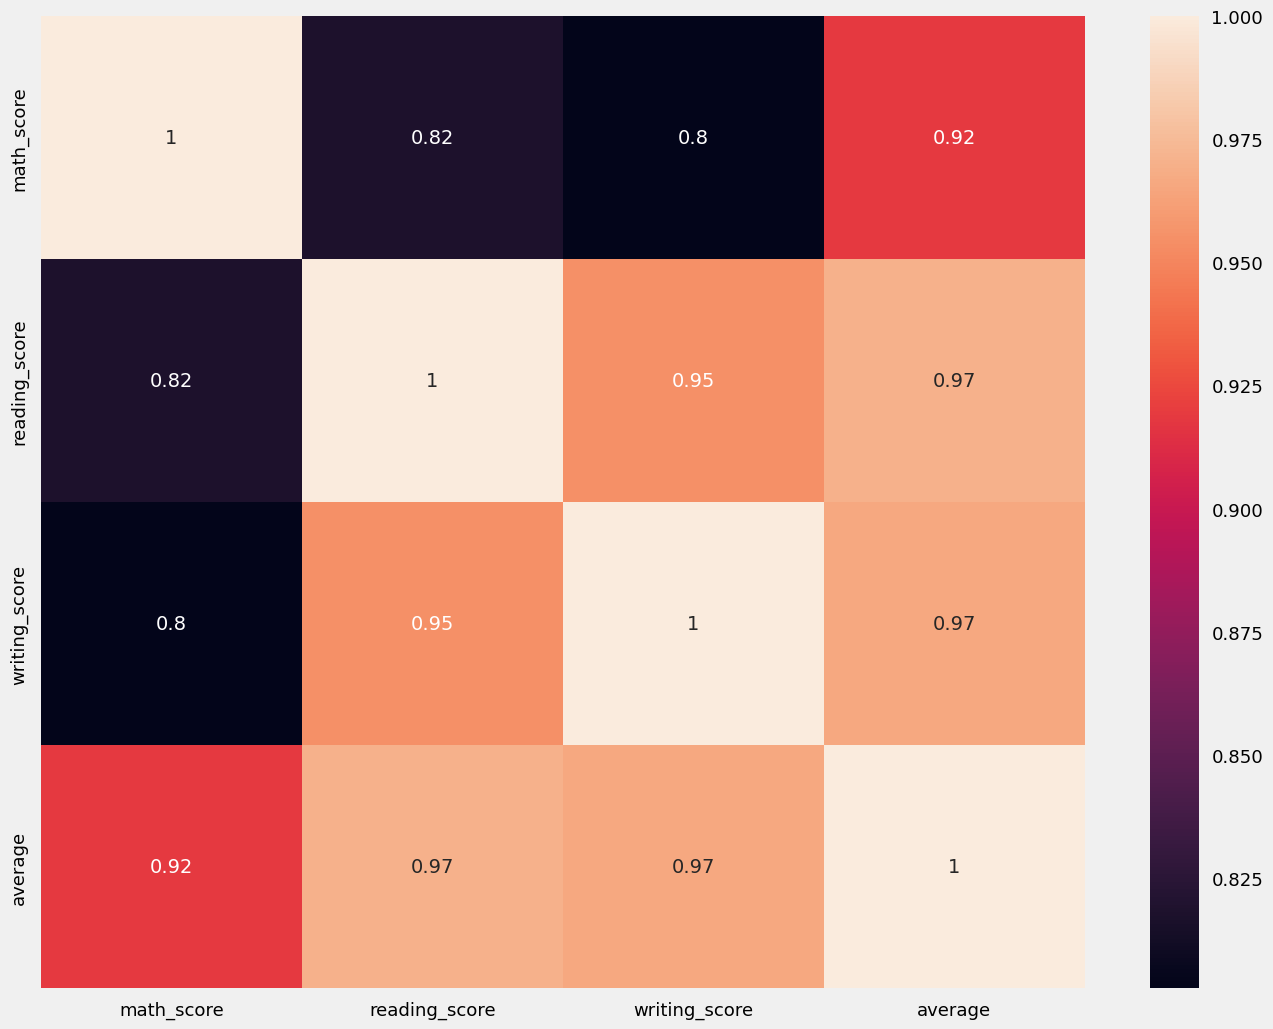

In [33]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), annot =True)
plt.show()

Insights
- From the pair plot it is clear that all the scores increase linearly with each other.
- Also, dropping columns 'average' and 'writing_score' due high correlation.

## 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.

## 6. Model Training
### Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [34]:
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

Preparing X and Y variables

In [35]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [36]:
# Feature Engineering using OneHotEncoding and mapping

# Column Gender
gender_dummies = pd.get_dummies(df['gender'], prefix='gender_', drop_first=True)

df = pd.concat([df, gender_dummies], axis = 1)

# Column race_ethnicity
race_ethnicity_dummies = pd.get_dummies(df['race_ethnicity'], prefix='RE_', drop_first=True)

df = pd.concat([df, race_ethnicity_dummies], axis = 1)

# Column parental_level_of_education
parental_level_of_education_dummies = pd.get_dummies(df['parental_level_of_education'], 
                                                     prefix = 'PLE_', 
                                                     drop_first= True)

df = pd.concat([df, parental_level_of_education_dummies], axis = 1)

# Column lunch
lunch_dummies = pd.get_dummies(df['lunch'], prefix='lunch_', drop_first=True)

df = pd.concat([df, lunch_dummies], axis = 1)

# Column test_preparation_course
test_prep_dummies = pd.get_dummies(df['test_preparation_course'], prefix='test_prep_', drop_first=True)

df = pd.concat([df, test_prep_dummies], axis = 1)

df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average,gender__male,RE__group B,RE__group C,RE__group D,RE__group E,PLE__bachelor's degree,PLE__high school,PLE__master's degree,PLE__some college,PLE__some high school,lunch__standard,test_prep__none
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,0,1,0,0,0,1,0,0,0,0,1,1
1,female,group C,some college,standard,completed,69,90,88,82.333333,0,0,1,0,0,0,0,0,1,0,1,0
2,female,group B,master's degree,standard,none,90,95,93,92.666667,0,1,0,0,0,0,0,1,0,0,1,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,1,0,0,0,0,0,0,0,0,0,0,1
4,male,group C,some college,standard,none,76,78,75,76.333333,1,0,1,0,0,0,0,0,1,0,1,1


In [37]:
# Dropping orginial columns

df = df.drop(['gender',
              'race_ethnicity', 
              'parental_level_of_education', 
              'lunch', 
              'test_preparation_course', 
              'average', 
              'reading_score'], axis = 1)

df.head()

,math_score,writing_score,gender__male,RE__group B,RE__group C,RE__group D,RE__group E,PLE__bachelor's degree,PLE__high school,PLE__master's degree,PLE__some college,PLE__some high school,lunch__standard,test_prep__none
0,72,74,0,1,0,0,0,1,0,0,0,0,1,1
1,69,88,0,0,1,0,0,0,0,0,1,0,1,0
2,90,93,0,1,0,0,0,0,0,1,0,0,1,1
3,47,44,1,0,0,0,0,0,0,0,0,0,0,1
4,76,75,1,0,1,0,0,0,0,0,1,0,1,1


In [38]:
X = df.drop(columns=['math_score'],axis=1)
X.head()

,writing_score,gender__male,RE__group B,RE__group C,RE__group D,RE__group E,PLE__bachelor's degree,PLE__high school,PLE__master's degree,PLE__some college,PLE__some high school,lunch__standard,test_prep__none
0,74,0,1,0,0,0,1,0,0,0,0,1,1
1,88,0,0,1,0,0,0,0,0,1,0,1,0
2,93,0,1,0,0,0,0,0,1,0,0,1,1
3,44,1,0,0,0,0,0,0,0,0,0,0,1
4,75,1,0,1,0,0,0,0,0,1,0,1,1


In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_num = scaler.fit_transform(X[['writing_score']])

X_num = pd.DataFrame(X_num, columns = ['writing_score'])

X = X.drop(['writing_score'], axis= 1)

X = pd.concat([X, X_num],axis= 1)

X.head()


,gender__male,RE__group B,RE__group C,RE__group D,RE__group E,PLE__bachelor's degree,PLE__high school,PLE__master's degree,PLE__some college,PLE__some high school,lunch__standard,test_prep__none,writing_score
0,0,1,0,0,0,1,0,0,0,0,1,1,0.391492
1,0,0,1,0,0,0,0,0,1,0,1,0,1.313269
2,0,1,0,0,0,0,0,1,0,0,1,1,1.642475
3,1,0,0,0,0,0,0,0,0,0,0,1,-1.583744
4,1,0,1,0,0,0,0,0,1,0,1,1,0.457333


In [40]:
y = df['math_score']
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

In [41]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

print(f'X_train Dimensions: {X_train.shape}')
print(f'X_test Dimensions: {X_test.shape}')
print(f'y_train Dimensions: {y_train.shape}')
print(f'X_test Dimensions: {y_test.shape}')

X_train Dimensions: (750, 13)
X_test Dimensions: (250, 13)
y_train Dimensions: (750,)
X_test Dimensions: (250,)


In [42]:
X_train.head()

,gender__male,RE__group B,RE__group C,RE__group D,RE__group E,PLE__bachelor's degree,PLE__high school,PLE__master's degree,PLE__some college,PLE__some high school,lunch__standard,test_prep__none,writing_score
82,1,0,0,0,0,0,0,0,1,0,0,0,-0.925332
991,0,1,0,0,0,0,0,0,0,1,1,0,0.654857
789,0,0,1,0,0,0,0,1,0,0,0,1,-0.464444
894,0,0,0,0,1,0,0,0,0,0,1,1,0.062286
398,1,1,0,0,0,0,0,0,0,1,1,1,-0.727809


In [43]:
y_train.head()

82     50
991    65
789    52
894    59
398    74
Name: math_score, dtype: int64

### Building Linear Model

In [44]:
# importing statsmodel libraray for api

import statsmodels.api as sm

Fitting a regression line through the training data using `statsmodels`. by default, statsmodels fit a regression line passing through the origin. So adding a constant to explicitly fit using `sm.add_constant(X)`.

In [45]:
# Adding a constant

X_train_lm = sm.add_constant(X_train)

In [46]:
# Applying OLS model on all variables in dataframe df

lr_model = sm.OLS(y_train, X_train_lm).fit()

# Summary
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:             math_score   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     380.9
Date:                Thu, 27 Apr 2023   Prob (F-statistic):          3.32e-316
Time:                        20:45:19   Log-Likelihood:                -2325.4
No. Observations:                 750   AIC:                             4679.
Df Residuals:                     736   BIC:                             4743.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     55

In [47]:
# Lets predict y with lr_model

y_pred = lr_model.predict(X_train_lm)

y_pred

82      55.954748
991     68.444134
789     49.057390
894     67.263056
398     65.573707
323     44.002524
519     66.268057
916    105.722264
922     72.977226
5       71.273487
731     49.294448
465     83.549013
97      65.256156
266     72.149744
357     55.456741
868     76.654410
798     67.179646
380     76.067404
631     73.358163
381     96.363895
490     66.499629
118     54.555081
900     92.299655
250     54.546210
523     52.024810
9       42.213324
196     65.271977
603     55.346425
81      50.933445
783     51.210002
587     50.683809
797     75.519409
239     85.732130
290     74.226729
211     32.451861
717     86.684991
359     81.264687
449     79.034824
227     61.471824
950     83.729485
946     87.739915
796     76.812359
501     80.946468
464     65.062630
362     51.909159
468     72.413516
935     61.807390
428     58.882282
7       44.930225
155     76.922676
541     78.366336
440     68.293624
482     65.050499
422     50.693344
778     72.535695
949     65

In [48]:
# Checking model performance

from sklearn.metrics import mean_squared_error

rss = np.sum(np.square(y_train - y_pred)) 
print(f'RSS : {rss}')

mse = mean_squared_error(y_train, y_pred) 
print(f'MSE : {mse}')

rmse = mse**0.5 
print(f'RMSE : {rmse}')

RSS : 21658.41051936301
MSE : 28.877880692484013
RMSE : 5.373814352253342


In [49]:
from sklearn import metrics

metrics.r2_score(y_train, y_pred)

0.8706123174076199

In [50]:
# Residual analysis

y_res = y_train - y_pred 

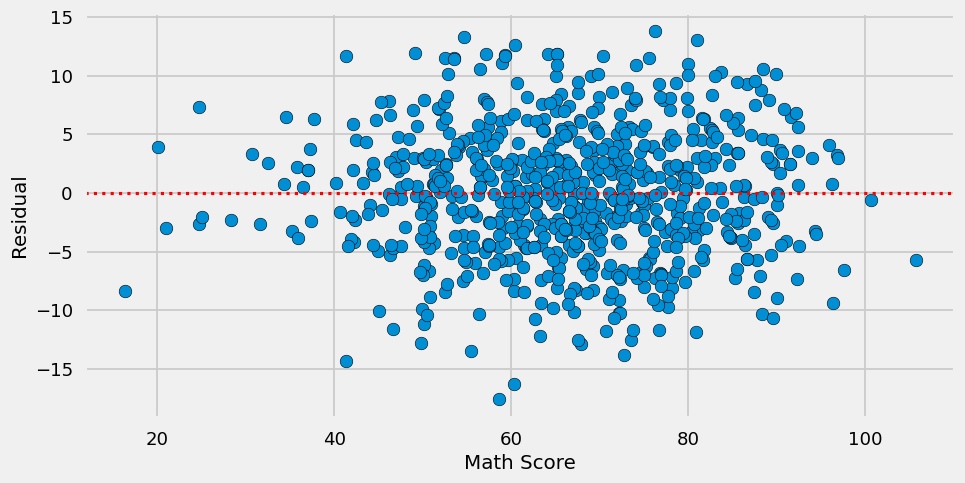

In [51]:
# Residual v/s predictions plot

plt.figure(figsize = (10,5))
plt.scatter( y_pred , y_res, edgecolor='black')
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Math Score")
plt.ylabel("Residual")
plt.show()

### Inferences:

- From Residual v/s predictions plot: The residuals are randomly scattered around zero and there is no clear pattern, this suggests that the model is capturing the linear relationship between the predictor variables and the outcome variable.

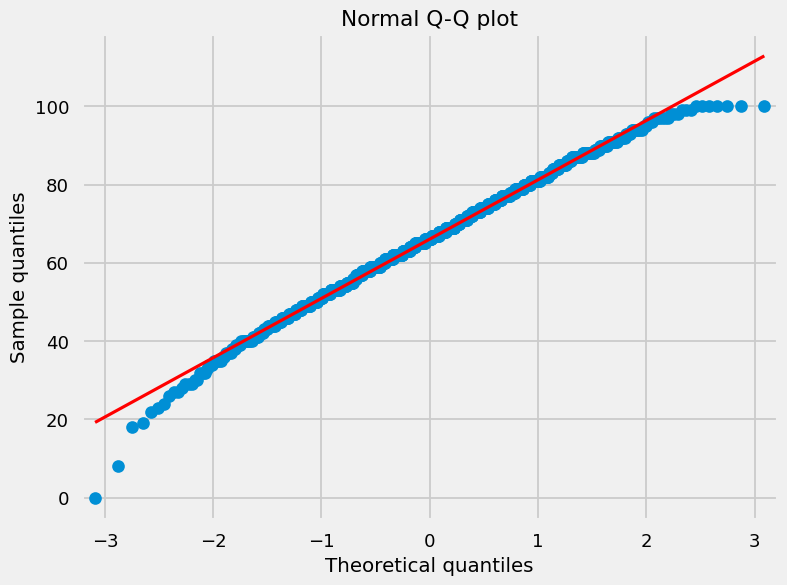

In [52]:
# Create a Q-Q plot for the target variable y
fig, ax = plt.subplots(figsize=(8, 6))
sm.qqplot(y, line='s', ax=ax)

# Set the title and axis labels
ax.set_title('Normal Q-Q plot')
ax.set_xlabel('Theoretical quantiles')
ax.set_ylabel('Sample quantiles')

# Show the plot
plt.show()


### Inferences:

- The data is normally distributed, the points on the Q-Q plot will lie close to a straight line. WE can see end points of data deviates from normality, the points will deviate from the straight line in a particular way that indicates the nature of the deviation.

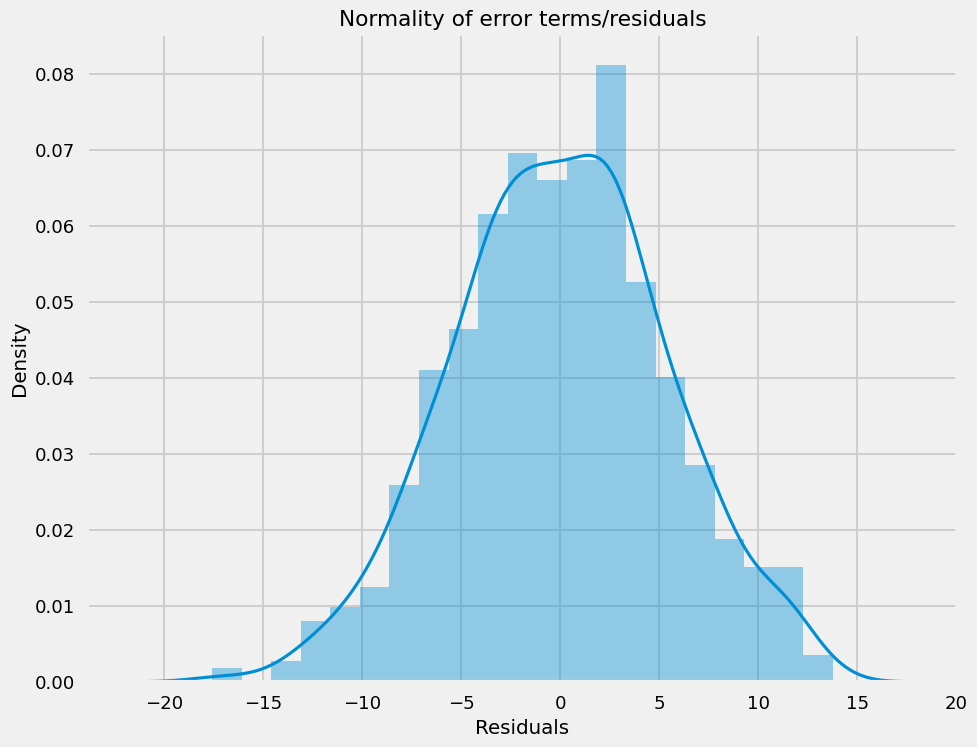

In [53]:
# Distribution of errors

plt.figure(figsize = (10,8))

p = sns.distplot(y_res,kde=True)

p = plt.title('Normality of error terms/residuals')

plt.xlabel("Residuals")
plt.show()

### Inferences:

- The errors are normally distributed, it may indicate that the model is not misspecified or that there are outliers in the data that are not affecting the fit of the model.

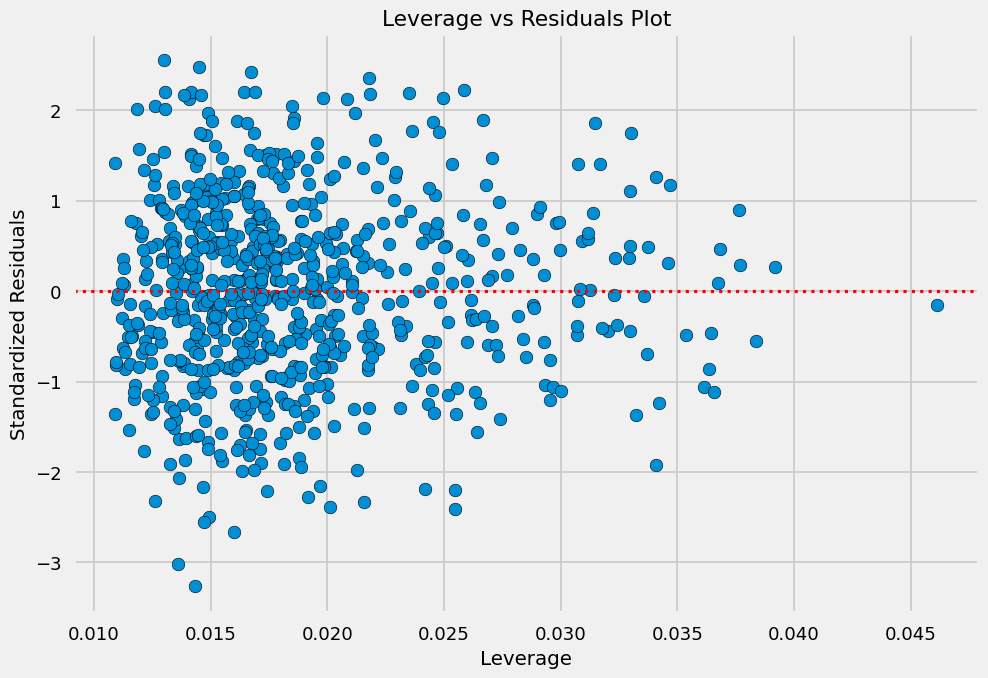

In [54]:
np.random.seed(123)

# calculate leverage and standardized residuals
leverage = lr_model.get_influence().hat_matrix_diag
std_residuals = lr_model.get_influence().resid_studentized_internal

# create leverage vs residual plot
fig, ax = plt.subplots()
ax.scatter(leverage, std_residuals, edgecolor='black')
plt.axhline(y=0, color='r', linestyle=':')
ax.set_xlabel("Leverage")
ax.set_ylabel("Standardized Residuals")
ax.set_title("Leverage vs Residuals Plot")
plt.show()


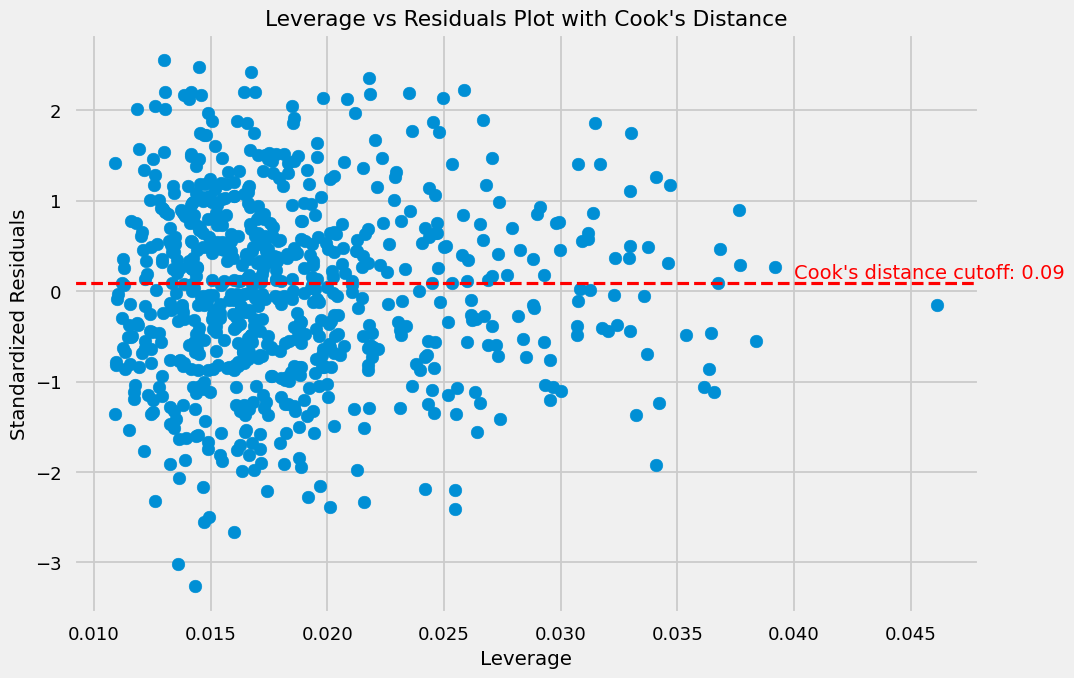

In [92]:
# calculate leverage, standardized residuals, and Cook's distance
leverage = lr_model.get_influence().hat_matrix_diag
std_residuals = lr_model.get_influence().resid_studentized_internal
cooks_d = lr_model.get_influence().cooks_distance[0]

# create leverage vs residual plot with Cook's distance
fig, ax = plt.subplots()
ax.scatter(leverage, std_residuals)
ax.set_xlabel("Leverage")
ax.set_ylabel("Standardized Residuals")
ax.set_title("Leverage vs Residuals Plot with Cook's Distance")

# add Cook's distance cutoff line
cutoff = 3/np.sqrt(y.size)
ax.axhline(y=cutoff, color='r', linestyle='--')
ax.text(x=0.04, y=cutoff+0.05, s=f"Cook's distance cutoff: {cutoff:.2f}", color='r')

# add Cook's distance values as text labels
for i, cd in enumerate(cooks_d):
    if cd > 3/np.sqrt(y.size):
        ax.text(leverage[i], std_residuals[i], i, fontsize='medium', color='r')

plt.show()


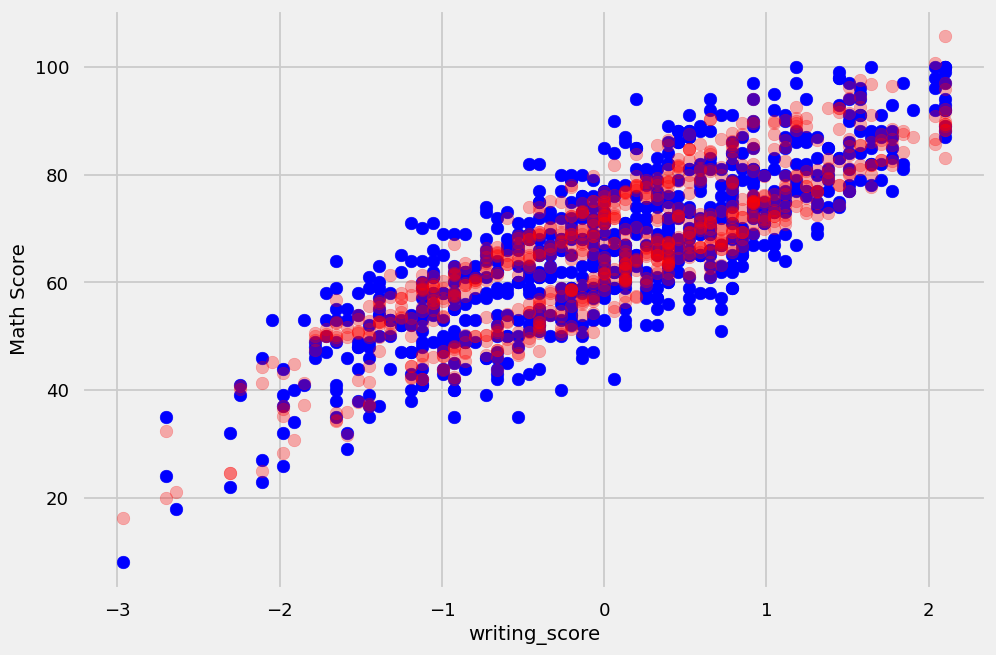

In [55]:
# Visual comparison between predicted and actual values

plt.scatter(X_train_lm['writing_score'] , y_train , color = 'blue') # actual values
plt.scatter(X_train_lm['writing_score'] , y_pred , color = 'red', alpha= 0.3 ) # predicted values
plt.xlabel("writing_score")
plt.ylabel("Math Score")
plt.show()

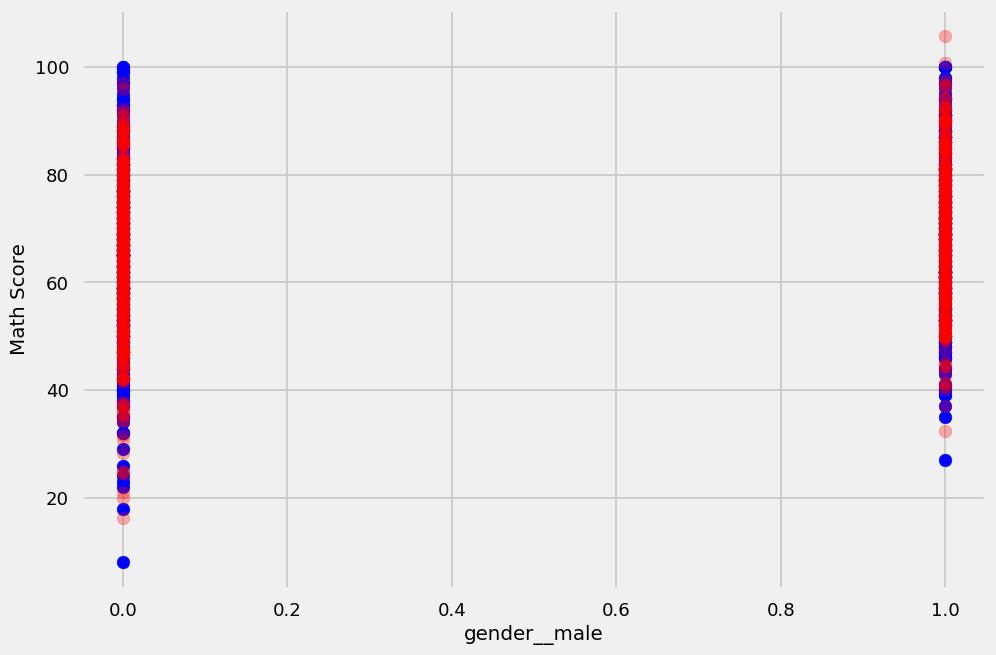

In [56]:
# Visual comparison between predicted and actual values
plt.scatter(X_train_lm['gender__male'] , y_train , color = 'blue') 
plt.scatter(X_train_lm['gender__male'] , y_pred , color = 'red', alpha= 0.3)

plt.xlabel("gender__male")
plt.ylabel("Math Score")

plt.show()

### Inferences:

- The plot showing a poisitive linear relationship, indicating that the predicted values are perfectly aligned with the actual values.

Linear OLS model is not violatoing any assumption. Keeping OLS model to determine model performance

In [57]:
# Printing OLS model summary with all variables

print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:             math_score   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     380.9
Date:                Thu, 27 Apr 2023   Prob (F-statistic):          3.32e-316
Time:                        20:45:20   Log-Likelihood:                -2325.4
No. Observations:                 750   AIC:                             4679.
Df Residuals:                     736   BIC:                             4743.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     55

### Inferences:
- we have poisitive coef for 3 variables which shows positive linear realtionship with math score variable.
- we have 13 variable which shows negative linear relationship with math score variable.
- we need to drop some variables whose p-value is high.
- R-squared = 1. so 100% of varience of model is defined by all the predictors.


##### Dropping variables on the basis of
- Significance of variables (p-value)
- VIF


`Checking VIF`
- Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other.


In [58]:
# Importing the statsmodels library for variance_inflation_factor

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [59]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by= 'VIF', ascending = False)
vif

,Features,VIF
0,const,20.73
3,RE__group C,3.34
4,RE__group D,3.06
2,RE__group B,2.65
5,RE__group E,2.40
7,PLE__high school,1.58
9,PLE__some college,1.57
10,PLE__some high school,1.52
13,writing_score,1.50
6,PLE__bachelor's degree,1.37


### Inferences:

- Here, infinite VIF value indicates that the corresponding variable may be expressed exactly by a linear combination of other variables.
- VIF is the reciprocal of the tolerance value ; small VIF values indicates low correlation among variables under ideal conditions VIF < 3. However, here it is acceptable if it is less than 5 or equal to 5.


`Dropping predictors`
Dropping Criteria used as follows:

- High p-value, High VIF
- High p-value, Low VIF
- Low p-value, High VIF
- Low p-value, Low VIF

In [60]:
# Dropping feature/predictor 'RE__group B' on the basis of high p-value i.e. 0.634

X = X_train_lm.drop("RE__group B", axis = 1)
X.head()

,const,gender__male,RE__group C,RE__group D,RE__group E,PLE__bachelor's degree,PLE__high school,PLE__master's degree,PLE__some college,PLE__some high school,lunch__standard,test_prep__none,writing_score
82,1.0,1,0,0,0,0,0,0,1,0,0,0,-0.925332
991,1.0,0,0,0,0,0,0,0,0,1,1,0,0.654857
789,1.0,0,1,0,0,0,0,1,0,0,0,1,-0.464444
894,1.0,0,0,0,1,0,0,0,0,0,1,1,0.062286
398,1.0,1,0,0,0,0,0,0,0,1,1,1,-0.727809


In [61]:
# Creating another model

# Adding constant 

X_train_lm = sm.add_constant(X)

# Creating second fitted model

lr_1 = sm.OLS(y_train, X_train_lm).fit()

# Summary

print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:             math_score   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     413.1
Date:                Thu, 27 Apr 2023   Prob (F-statistic):          1.79e-317
Time:                        20:45:20   Log-Likelihood:                -2325.5
No. Observations:                 750   AIC:                             4677.
Df Residuals:                     737   BIC:                             4737.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     54

In [62]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by= 'VIF', ascending = False)
vif

,Features,VIF
0,const,11.66
6,PLE__high school,1.58
8,PLE__some college,1.57
9,PLE__some high school,1.51
2,RE__group C,1.50
3,RE__group D,1.50
12,writing_score,1.50
5,PLE__bachelor's degree,1.37
4,RE__group E,1.35
7,PLE__master's degree,1.20


In [63]:
# Dropping feature/predictor 'PLE__bachelor's degree' on the basis of high p-value i.e. 0.179

X = X_train_lm.drop("PLE__bachelor's degree", axis = 1)
X.head()

,const,gender__male,RE__group C,RE__group D,RE__group E,PLE__high school,PLE__master's degree,PLE__some college,PLE__some high school,lunch__standard,test_prep__none,writing_score
82,1.0,1,0,0,0,0,0,1,0,0,0,-0.925332
991,1.0,0,0,0,0,0,0,0,1,1,0,0.654857
789,1.0,0,1,0,0,0,1,0,0,0,1,-0.464444
894,1.0,0,0,0,1,0,0,0,0,1,1,0.062286
398,1.0,1,0,0,0,0,0,0,1,1,1,-0.727809


In [64]:
# Creating another model

# Adding constant 

X_train_lm = sm.add_constant(X)

# Creating second fitted model

lr_1 = sm.OLS(y_train, X_train_lm).fit()

# Summary

print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:             math_score   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     449.8
Date:                Thu, 27 Apr 2023   Prob (F-statistic):          2.30e-318
Time:                        20:45:20   Log-Likelihood:                -2326.5
No. Observations:                 750   AIC:                             4677.
Df Residuals:                     738   BIC:                             4732.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    54.50

In [65]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by= 'VIF', ascending = False)
vif

,Features,VIF
0,const,10.18
2,RE__group C,1.50
3,RE__group D,1.50
11,writing_score,1.49
4,RE__group E,1.35
5,PLE__high school,1.34
7,PLE__some college,1.30
8,PLE__some high school,1.29
10,test_prep__none,1.16
1,gender__male,1.14


In [66]:
# Dropping feature/predictor 'PLE__master's degree' on the basis of high p-value i.e. 0.144

X = X_train_lm.drop("PLE__master's degree", axis = 1)
X.head()

,const,gender__male,RE__group C,RE__group D,RE__group E,PLE__high school,PLE__some college,PLE__some high school,lunch__standard,test_prep__none,writing_score
82,1.0,1,0,0,0,0,1,0,0,0,-0.925332
991,1.0,0,0,0,0,0,0,1,1,0,0.654857
789,1.0,0,1,0,0,0,0,0,0,1,-0.464444
894,1.0,0,0,0,1,0,0,0,1,1,0.062286
398,1.0,1,0,0,0,0,0,1,1,1,-0.727809


In [67]:
# Creating another model

# Adding constant 

X_train_lm = sm.add_constant(X)

# Creating second fitted model

lr_1 = sm.OLS(y_train, X_train_lm).fit()

# Summary

print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:             math_score   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     493.8
Date:                Thu, 27 Apr 2023   Prob (F-statistic):          2.93e-319
Time:                        20:45:20   Log-Likelihood:                -2327.6
No. Observations:                 750   AIC:                             4677.
Df Residuals:                     739   BIC:                             4728.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    54.33

In [68]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by= 'VIF', ascending = False)
vif

,Features,VIF
0,const,9.86
2,RE__group C,1.50
10,writing_score,1.49
3,RE__group D,1.48
4,RE__group E,1.35
5,PLE__high school,1.27
7,PLE__some high school,1.24
6,PLE__some college,1.23
9,test_prep__none,1.16
1,gender__male,1.14


Making Predictions Using the final model

In [69]:
X_test.head()

,gender__male,RE__group B,RE__group C,RE__group D,RE__group E,PLE__bachelor's degree,PLE__high school,PLE__master's degree,PLE__some college,PLE__some high school,lunch__standard,test_prep__none,writing_score
521,0,0,1,0,0,0,0,0,0,0,1,1,1.049904
737,0,1,0,0,0,0,0,0,1,0,0,0,0.325651
740,1,0,0,1,0,1,0,0,0,0,1,1,0.259809
660,1,0,1,0,0,0,0,0,1,0,0,1,0.325651
411,1,0,0,0,1,0,0,0,1,0,1,0,0.654857


In [70]:
# Dropping columns which are not present in training model

X_test = X_test[['RE__group C', 
                 'RE__group D', 
                 'RE__group E', 
                 'PLE__high school',
                 'PLE__some high school', 
                 'PLE__some college',
                'test_prep__none',
                'gender__male',
                'lunch__standard','writing_score']]

X_test.head()

,RE__group C,RE__group D,RE__group E,PLE__high school,PLE__some high school,PLE__some college,test_prep__none,gender__male,lunch__standard,writing_score
521,1,0,0,0,0,0,1,0,1,1.049904
737,0,0,0,0,0,1,0,0,0,0.325651
740,0,1,0,0,0,0,1,1,1,0.259809
660,1,0,0,0,0,1,1,1,0,0.325651
411,0,0,1,0,0,1,0,1,1,0.654857


In [71]:
# Addiong constant variable to the test dataframe

X_test = sm.add_constant(X_test)

X_test.head()

,const,RE__group C,RE__group D,RE__group E,PLE__high school,PLE__some high school,PLE__some college,test_prep__none,gender__male,lunch__standard,writing_score
521,1.0,1,0,0,0,0,0,1,0,1,1.049904
737,1.0,0,0,0,0,0,1,0,0,0,0.325651
740,1.0,0,1,0,0,0,0,1,1,1,0.259809
660,1.0,1,0,0,0,0,1,1,1,0,0.325651
411,1.0,0,0,1,0,0,1,0,1,1,0.654857


In [72]:
# Making predictions using the 20th model

y_pred = lr_1.predict(X_test)
y_pred.head()

521    88.302428
737    60.408138
740    65.465272
660    78.694905
411    70.654898
dtype: float64

<Figure size 1000x1000 with 0 Axes>

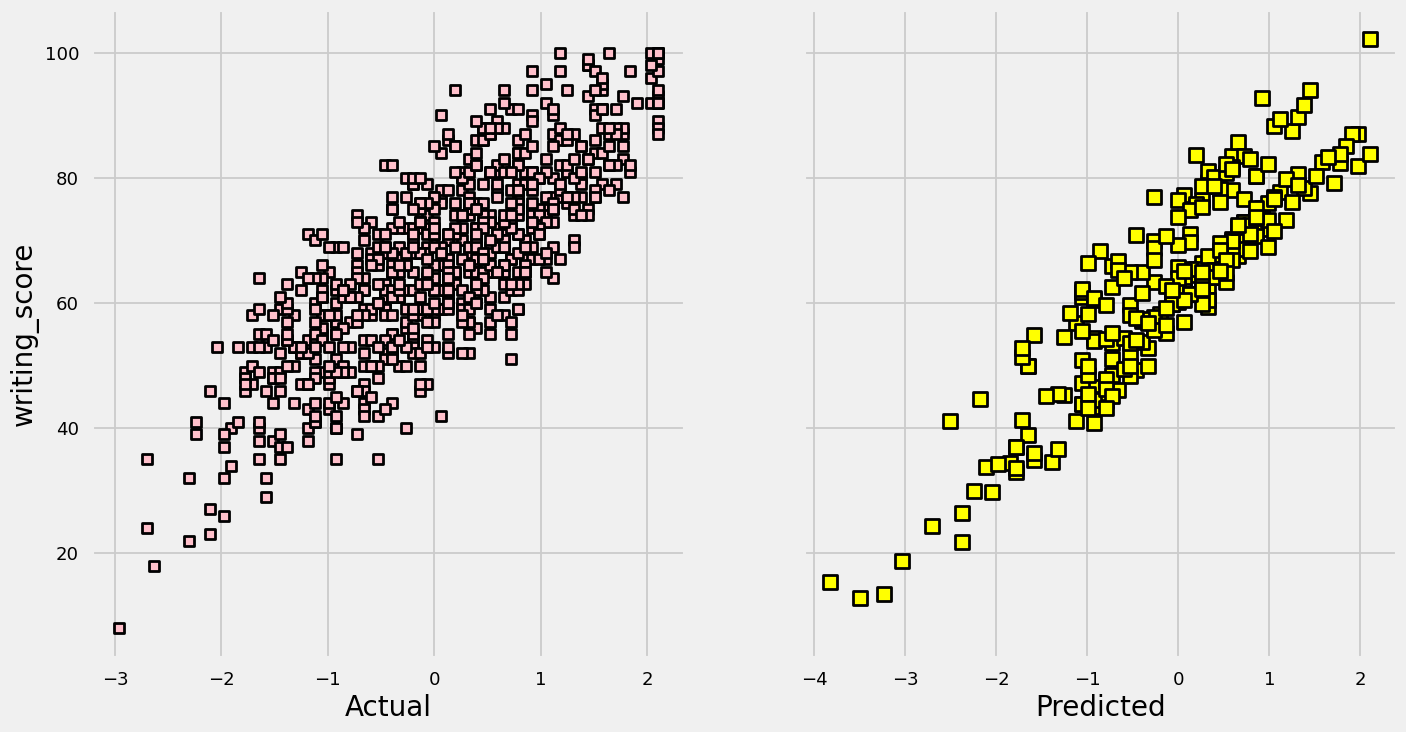

In [73]:
# Plotting Actual_Temp vs. Predictor_temp 

plt.figure(figsize=[10, 10])
f, axes = plt.subplots(1, 2, sharey=True, figsize = [15,8])

actual = axes[0].scatter(X_train_lm.writing_score.values, y_train, c ="pink",  
            linewidths = 2,  
            marker ="s",  
            edgecolor ="Black",  
            s = 50) 

axes[0].set_ylabel("writing_score", fontsize = 20)
axes[0].set_xlabel("Actual", fontsize = 20)

predicted= axes[1].scatter(X_test.writing_score.values, y_pred, c ="yellow", 
            linewidths = 2, 
            marker ="s",  
            edgecolor ="Black",  
            s = 100) 

axes[1].set_xlabel("Predicted", fontsize = 20)

plt.show()

In [74]:
# Importing sklearn library for r2_score

from sklearn.metrics import r2_score

In [75]:
# Calculating r2_score for y_test & y_test_pred

r2_score(y_true = y_test, y_pred = y_pred)

0.5185386539776202

<Figure size 1040x715 with 0 Axes>

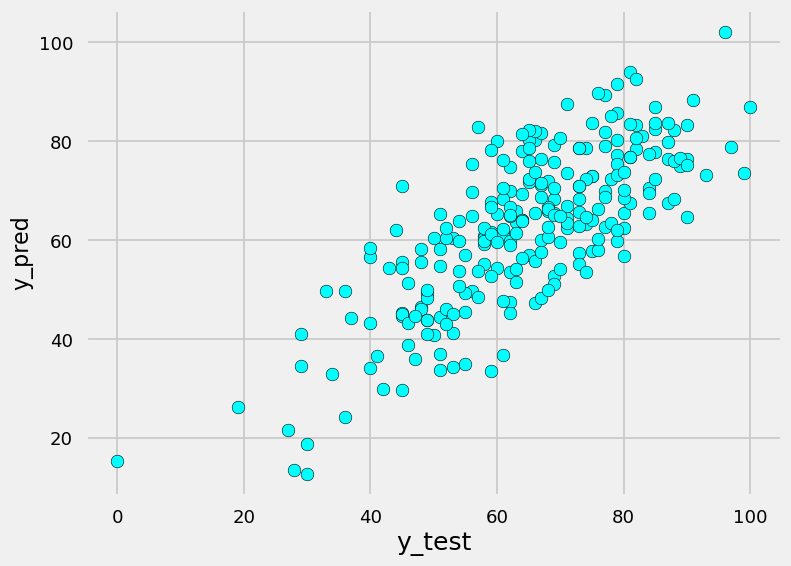

In [76]:
fig = plt.figure()
plt.figure(figsize=[8, 6])
plt.scatter(y_test, y_pred, color= 'cyan', edgecolor = 'Black')
fig.suptitle('y_test vs y_pred_m20', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_pred', fontsize = 16)
plt.show()

In [77]:
import scipy.stats as stats
import statsmodels.formula.api as smf

In [78]:
# print(df.columns)
lm_const = smf.ols(formula="math_score ~ 1", data =df).fit()
anova_table = sm.stats.anova_lm(lm_const, lr_1, test="F", typ="I")
print("Anova test against a constant")
print(anova_table)
print()
anova_table_2 = sm.stats.anova_lm(lr_1, lr_model, test="F",typ="I")
print("Anova test against full model")
print(anova_table_2)


Anova test against a constant
   df_resid            ssr  df_diff        ss_diff          F         Pr(>F)
0     999.0  229689.079000      0.0            NaN        NaN            NaN
1     739.0   21788.634402    260.0  207900.444598  27.120425  7.308396e-262

Anova test against full model
   df_resid           ssr  df_diff     ss_diff         F    Pr(>F)
0     739.0  21788.634402      0.0         NaN       NaN       NaN
1     736.0  21658.410519      3.0  130.223883  1.475097  0.219995


In [79]:
#need to get rid of spaces to work with this next ols form
df = df.rename(columns = {'RE__group C':"RE__group_C", 
                 'RE__group D':"RE__group_D", 
                 'RE__group E':"RE__group_E", 
                 'PLE__high school':"PLE__high_school",
                 'PLE__some high school':"PLE__some_high_school", 
                 'PLE__some college':"PLE__some_college"})
anova_test = df[['RE__group_C', 
                 'RE__group_D', 
                 'RE__group_E', 
                 'PLE__high_school',
                 'PLE__some_high_school', 
                 'PLE__some_college',
                'test_prep__none',
                'gender__male',
                'lunch__standard','writing_score']]
all_cols = "+".join(anova_test.columns)
anova_form = "math_score~"+all_cols
anova_test = smf.ols(formula=anova_form, data =df).fit()
anova_table = sm.stats.anova_lm(anova_test, typ=2)
print(anova_table)

                              sum_sq     df            F         PR(>F)
RE__group_C                29.087402    1.0     0.966197   3.258709e-01
RE__group_D               131.245105    1.0     4.359571   3.705694e-02
RE__group_E              1947.763242    1.0    64.698887   2.482730e-15
PLE__high_school          269.849578    1.0     8.963598   2.822630e-03
PLE__some_high_school     273.591108    1.0     9.087881   2.638740e-03
PLE__some_college         144.357040    1.0     4.795110   2.877362e-02
test_prep__none          3349.489196    1.0   111.260043   1.007205e-24
gender__male            40975.279881    1.0  1361.076615  4.436299e-188
lunch__standard          1958.315905    1.0    65.049415   2.101026e-15
writing_score          142161.682977    1.0  4722.187201   0.000000e+00
Residual                29773.894697  989.0          NaN            NaN


Interpretation:
- Looking at the full model, it is seen that the p-value is not low enough to reject the null hypothesis, which means those two models are not significantly different from each other. 
- The model compared to the mean value however is very much statistically significant. Looking at the individual columns, the most influential aspects on the math score is the writing score, then the gender. 
- After that whether the student completed the test prep or not, type of lunch, the student's socioeconomic status (RE__group), then finally their parents' education. 

### Applying other models

In [80]:
X = df.drop(columns=['math_score'],axis=1)

In [81]:
y = df['math_score']

In [82]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [83]:
X = preprocessor.fit_transform(X)

In [84]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 13), (200, 13))

In [85]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [86]:
models = {
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_test_list =[]
r2_train_list = []
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))
    r2_train_list.append(model_train_r2)

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_test_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Lasso
Model performance for Training set
- Root Mean Squared Error: 6.0555
- Mean Absolute Error: 4.8060
- R2 Score: 0.8374
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.2379
- Mean Absolute Error: 4.8798
- R2 Score: 0.8401


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.4033
- Mean Absolute Error: 4.3487
- R2 Score: 0.8705
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.6047
- Mean Absolute Error: 4.3675
- R2 Score: 0.8709


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 8.3629
- Mean Absolute Error: 6.7095
- R2 Score: 0.6898
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 11.5883
- Mean Absolute Error: 8.8950
- R2 Score: 0.4481


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 1.2224
- Mean Absolute Error: 0.3333
- R2 Score: 0.9934
--------------------------

In [87]:
pd.DataFrame(list(zip(model_list, r2_train_list, r2_test_list)), 
             columns=['Model Name', 'R2_Train_Score', 'R2_test_score'])

,Model Name,R2_Train_Score,R2_test_score
0,Lasso,0.837352,0.840093
1,Ridge,0.870497,0.870910
2,K-Neighbors Regressor,0.689783,0.448136
3,Decision Tree,0.993372,0.683645
4,Random Forest Regressor,0.971237,0.819147
5,XGBRegressor,0.984841,0.799596
6,CatBoosting Regressor,0.942032,0.825226
7,AdaBoost Regressor,0.843873,0.829470
